In [2]:
!pip activate jlab-test

ERROR: unknown command "activate"



In [1]:
#!wget --no-cache -O init.py -q https://raw.githubusercontent.com/UDEA-Esp-Analitica-y-Ciencia-de-Datos/EACD-02-ESTADISTICA/master/init.py
#import init; init.init(force_download=False); 
from IPython.display import Image

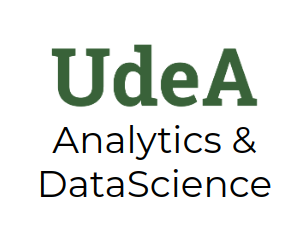

In [2]:
Image("../../docs/udea-datascience.png")

# **Funciones de Probabilidad, intervalos de confianza y prueba de hipótesis**

## Desarrollado por: Prof. Javier Fernando Botía Valderrama

## Materia: Estadística y Análisis Exploratorio

## Universidad de Antioquia

# Poblaciones y Muestras

En la estadística, es normal el uso de datos desde un conjunto de muestras selecionadas para sacar unas conclusiones derivadas del análisis de una población de datos. Debido a lo anterior, uno de los retos grandes de la estadística es determinar un tamaño de muestra de los datos que sea lo suficientemente representativo para tomar una decisión acertada. Por consiguiente, es necesario conocer la diferencia entre población y muestra:

*   **Población**: consiste en todos los elementos de un conjunto de datos.
*   **Muestras**: consiste de una o más observaciones desde la población. 

Cuando se estima un parámetro de una población, por ejemplo, la edad de los programadores de Python, tipicamente no podemos *medir* todos los programadores. Por está razón, es necesario limitar el análisis a una *muestra aleatoria* que permita inferir en una decisión o una conclusión a partir de los datos de muestra. Tales medidas son la media, la varianza, entre otras que más adelante los llamaremos como **estadísticos**, que es una caracteristica medible desde una muestra de datos.

Aunque ya sabemos la diferencia entre población y muestras, ¿Cómo se selecciona la muestra desde una población?. Para responder a esa inquietud, hay dos clases de muestreo:

*   **Muestreo sin reemplazos:** Una población de observaciones o individuos se selecciona una sola vez y *no se puede devolver de nuevo a la población*.
*   **Muestreo con reemplazos:** Se realiza una selección aleatoria de observaciones o individuos antes de que el próximo sea seleccionado. A diferencia del muestreo sin reemplazos, se puede seleccionar más de una vez la población de individuos.

Veamos un ejemplo práctico de poblaciones y muestras.

In [1]:
import pandas as pd

X = pd.DataFrame()
X['poblacion'] = [101, 150, 136, 147, 201, 180, 165, 199, 122, 133, 177, 141, 159, 205, 144, 106, 111, 185]
Muestreo_SIN = X['poblacion'].sample(6,replace = False)
Muestreo_CON = X['poblacion'].sample(6,replace = True)

print("Muestreo sin reemplazos = \n", Muestreo_SIN)
print("\n")
print("Muestreo con reemplazos = \n", Muestreo_CON)

Muestreo sin reemplazos = 
 7     199
11    141
17    185
1     150
4     201
16    111
Name: poblacion, dtype: int64


Muestreo con reemplazos = 
 3     147
10    177
0     101
5     180
5     180
8     122
Name: poblacion, dtype: int64


Otros dos conceptos que vamos a considerar para esta unidad son las siguientes:

*   **Distribución de la muestra:** Son *distribuciones* de probabilidad de una estadística dada basada en una muestra aleatoria de los datos.
*   **Inferencia estadística:** permite hacer una conjetura sobre un parámetro de la población basado en una estadística calculada a partir de una muestra extraida aleatoriamente desde esa población.

## Probabilidad

Es la asignación de un número real postivo, entre $0$ y $1$, a cada evento que indique la posibilidad que el evento ocurra.

Suponga que en un experimento se puede realizar $n$ veces bajo las mismas condiciones. Si consideramos un evento $A$, se puede afirmar que:

$$P(A) = \frac{n(A)}{n}$$

donde $n(A)$ es el número de veces que ocurre en $n$ experimentos. La anterior fórmula se llama **frecuencia relativa** que permite conocer una valor probable que suceda un evento de acuerdo al número de veces que se genera un evento. 

Veamos un ejemplo práctico de la frecuencia relativa.

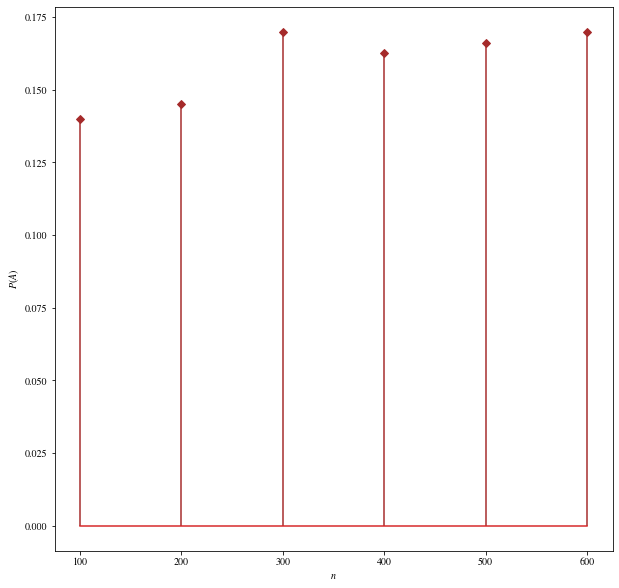

In [2]:
import numpy as np
import matplotlib
from matplotlib import pyplot

matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

n = np.arange(100, 700, 100)
nA = 14,29,51,65,83,102
f = nA/n

fig = pyplot.figure(figsize=(10,10))
pyplot.stem(n, f, linefmt='brown', markerfmt='D')
pyplot.xlabel('$n$')
pyplot.ylabel('$P(A)$')
pyplot.show()

Observen que ha medida que aumenta $n$, se estabiliza la frecuencia relativa. Lo anterior se llama **regularidad estadística**, el cual permite hacer predicciones que eliminan, aunque sea parcial, la incertidumbre en los fenómenos impredecibles. Sin embargo, el valor de $f(A)$ alrededor del cual se está estabilizando la frecuencia relativa de *un evento*, indica la *posibilidad* de ocurrencia de un solo evento.

Considerando lo anterior, definimos $\mathbb{P}(A)$ como la probabilidad de un evento, que cumple las siguientes propiedades:

1.   Si $n(A) \geq 0$, entonces $0 \leq \mathbb{P}(A) \leq 1$
2.   Si $n(\Omega) = n$, entonces $\mathbb{P}(\Omega) = 1$
3.   Si $A$ y $B$ son dos eventos excluyentes, entonces $n(A \cup B) = n(A) + n(B)$ y por consiguiente, $\mathbb{P}(A \cup B) = \mathbb{P}(A) + \mathbb{P}(B) - \mathbb{P}(A \cap B)$
4.   Si consideramos un conjunto de eventos mutuamente excluyentes, $A_1, \ldots, A_i, \ldots, A_N$, entonces:

$$\mathbb{P}\left( \bigcup_{i=1}^N A_i \right) = \sum_{i=1}^N \mathbb{P}(A_i)$$

5.   El complemento de la probabilidad de un evento $A$:

$$\mathbb{P}(A^c) = 1 - \mathbb{P}(A)$$



## Probabilidad Marginal

La probabilidad marginal es una representación de un evento ocurrido, $\mathbb{A}$, que no esta condicionado a otro evento diferente. 

*Por ejemplo*, consideremos la probabilidad que una carta tenga color azul, es decir, $\mathbb{P}(A = azul) = 0.25$ o la probabilidad que la carta tenga el número 5, es decir, $\mathbb{P}(B = número) = 0.15$. Observen que es una probabilidad de un único evento y aunque $A$ y $B$ son dos eventos, cada uno son sucesos diferentes y no están condicionados uno con respecto al otro.

## Probabilidad Condicional

**Descripción Preliminar**

Muchas veces se obtiene información parcial acerca de los eventos aleatorios antes de conocer el resultado final o información apriori. Considerando esta información, se puede cambiar la estructura del espacio muestral. Supongamos que al medir la probabilidad de ocurrencia de un evento se tiene la información que el evento $A$ ya sucedio, para $n$ veces que se repite el evento, tenemos la siguiente expresión:

$$P(B\vert A) = \frac{n(A \cap B)}{n(A)} = \frac{\frac{n(A\cap B)}{n}}{\frac{n(A)}{A}}$$

*Por ejemplo*, se lanza dos dados:

$$\Omega = \lbrace (1,1), (1,2), \ldots, (6,6)\rbrace$$

Como el número de lanzamientos posibles es $n(\Omega) = 36$, Si $A = $ Evento que la suma sea $7$ sin información apriori:

$$\mathbb{P}(A) = \frac{6}{36} = \frac{1}{6}$$

Lo anterior se obtiene si se realiza el siguiente análisis:

$$1+6 = 7$$
$$6+1 = 7$$
$$3+4 = 7$$
$$4+3 = 7$$
$$5+2 = 7$$
$$2+5 = 7$$

Obseerven que hay $6$ eventos que suman igual a $7$. 

Ahora supongamos que hay un evento $B$ que dice que sale un $3$ en uno de los dos dados. Inicialmente, se tiene:

$$\Omega = \lbrace (3,1), (3,2), (3,3), (3,4), (3,5), (3,6), (1,3), (2,3), (3,3), (4,3), (5,3), (6,3) \rbrace$$

En este caso, $n(\Omega) = 12$

Como solo hay dos eventos que al salir un $3$ en uno de los dados, entonces se considera $(3,4)$ y $(4,3)$, y por consiguiente, son $2$ eventos que se presentan. Por consiguiente:

$$\mathbb{P}(A\vert B) = \frac{n(A\cap B)}{n(B)} = \frac{2}{12} = \frac{1}{6}$$

Para este caso, $n(B) = n{(\Omega)}$ y $n(A \cap B) = 2$. En este cálculo, $\mathbb{P}(A\vert B)$ significa que es la probabilidad de un evento $A$ dado que ocurra un evento $B$.

A partir de estos puntos preliminares, se define el concepto de probabilidad condicional


**Probabilidad Condicional:** Es la probabilidad de un evento $A$ dado un evento $B$ que ocurrío a priori:

$$\mathbb{P}(A\vert B) = \frac{\mathbb{P}(A \cap B)}{\mathbb{P}(B)}$$

o en caso contrario:

$$\mathbb{P}(B\vert A) = \frac{\mathbb{P}(A \cap B)}{\mathbb{P}(A)}$$

donde $\mathbb{P}(B) > 0$ y $\mathbb{P}(A) > 0$. La probabilidad condicional cumple con las siguientes condiciones:

1.   $\mathbb{P}(A\vert A) = 1$
2.   $\mathbb{P}(A^c\vert B) = 1 - \mathbb{P}(A\vert B)$, siendo $A^c$ el complemento.
3.   $\mathbb{P}(A \cap B \vert C) = \mathbb{P}(A\vert B\cap C)\cdot \mathbb{P}(B \vert C)$
4.   $\mathbb{P}(A \cap B \cap C) = \mathbb{P}(C \vert A \cap B)\cdot \mathbb{P}(A \cap B)$

Veamos un ejemplo práctico de la cuarta propiedad de la probabilidad condicional



*Ejemplo:* Se tiene una caja con 12 bolas, de los cuales 3 son de color negro y 9 son de color azul. Se seleccionan 3 bolas de forma aleatoria sin repetir de nuevo una nueva selección. ¿Cuál es la probabilidad que la bola sea azul, la segunda bola sea también azul y la tercera bola sea negra?

In [3]:
import numpy as np

# Evento A es una bola azul
# Evento B es una bola azul
# Evento C es una bola negra

N = 12 # 12 Bolas en total
N_A = 9 # 9 bolas azul
N_N = 3 # 3 bolas negras
P_A = N_A/N # Probabilidad que salga bola de color azul en el primer intento

# Si se descarta una bola azul en el segundo intento entonces...

P_B_cond_A = (N_A - 1)/(N - 1)

# Si se descarta dos bolas para salga azul, entonces...

P_C_cond_A_cap_B = N_N/(N - 2)

print("Probabilidad del intento 1 = ", P_A)
print("Probabilidad del intento 2 = ", P_B_cond_A)
print("Probabilidad del intento 3 = ", P_C_cond_A_cap_B)

Probabilidad del intento 1 =  0.75
Probabilidad del intento 2 =  0.7272727272727273
Probabilidad del intento 3 =  0.3


Como $\mathbb{P}(B\vert A) = \frac{\mathbb{P}(A \cap B)}{\mathbb{P}(A)}$, entonces se puede decir que:

$$\mathbb{P}(A \cap B) = \mathbb{P}(B\vert A)\cdot \mathbb{P}(A)$$

Por consiguiente:

$$\mathbb{P}(A \cap B \cap C) = \mathbb{P}(C \vert A \cap B)\cdot \mathbb{P}(B\vert A)\cdot \mathbb{P}(A)$$

In [4]:
P_A_cap_B_cap_C = P_C_cond_A_cap_B * P_B_cond_A * P_A
print("La probabilidad que la bola sea azul en el intento 1, azul en el intento 2 y negra en el intento 3 es = {:.3f}".format(P_A_cap_B_cap_C))

La probabilidad que la bola sea azul en el intento 1, azul en el intento 2 y negra en el intento 3 es = 0.164


## Independencia de eventos

La independencia de eventos establece una interpretación si dos eventos, $A$ y $B$, son independientes entre sí, cuando se cumpla la condición $A \cap B = \emptyset$. Si se cumple esta condición, entonces:

$$\mathbb{P}(A \cap B) = \mathbb{P}(A)\cdot \mathbb{P}(B)$$

En caso que no sean independientes ambos eventos, entonces:

$$\mathbb{P}(A \cap B) \neq \mathbb{P}(A)\cdot \mathbb{P}(B)$$

Si se presenta lo anterior, entonces $A$ y $B$ son mutuamente excluyentes pero no independientes.

**Nota:** $\mathbb{P}(A \cap B) = \mathbb{P}(A)\cdot \mathbb{P}(B)$ también se le llama **probabilidad conjunta** de dos eventos.

Veamos un ejemplo práctico.

In [ ]:
# A = evento que la moneda salga cara
# B = evento que la moneda salga sello.

P_A = 0.5 # Probabilidad que salga cara.
P_B = 0.5 # Probabilidad que salga sello.

P_A_cap_B = P_A * P_B

print("Probabilidad que A y B sean independientes es = {:.3f}".format(P_A_cap_B))

Como la probabilidad es de $0.25$, y como se busca que $\mathbb{P}(A \cap B) = 0$, entonces $A$ y $B$ no son independientes entre sí.

## Teorema de la probabilidad total y de Bayes

El teorema de la probabilidad total permite establecer una suma de particiones del espacio muestral y de cualquier evento. En este caso, consideramos $B$ como las particiones del espacio muestral $\Omega$ y $D$ es cualquier evento:

$$\mathbb{P}(D) = \mathbb{P}(D \cap B_1) + \mathbb{P}(D \cap B_2) + \ldots + \mathbb{P}(D \cap B_i) + \ldots$$

La anterior expresión se puede presentar mediante probabilidades condicionales:

$$\mathbb{P}(D) = \mathbb{P}(D \vert B_1)\cdot\mathbb{P}(B_1) + \mathbb{P}(D \vert B_2)\cdot\mathbb{P}(B_2) + \ldots + \mathbb{P}(D \vert B_i)\cdot\mathbb{P}(B_i) + \ldots$$

Y por consiguiente, se puede reescribir la probabilidad total como:

$$\mathbb{P}(D) = \sum_{i \geq 1} \mathbb{P}(D \vert B_i)\cdot\mathbb{P}(B_i)$$

A partir de la expresión de la probabilidad total, se define el teorema de Bayes como sigue:

Considere que se conoce que un evento $D$ ya ocurrio, si se desea conocer la probabilidad que haya ocurrido en el evento de la partición $B_i$, se establece que:

$$\mathbb{P}(B_i \vert D) = \frac{\mathbb{P}(D\cap B_i)}{\mathbb{P}(D)} = \frac{\mathbb{P}(D \vert B_i)\cdot \mathbb{P}(B_i)}{\sum_{i \geq 1} \mathbb{P}(D \vert B_i)\cdot\mathbb{P}(B_i)}$$

Veamos un ejemplo práctico del teorema de Bayes.

*Ejemplo:* En una fábrica, hay tres máquinas que llamaremos $A$, $B$ y $C$ que producen el $45\%$, $30\%$ y $25\%$ del total de piezas producidas por día. Sin embargo, se estiman que los porcentajes de producción de piezas defectuosas por las tres máquinas son $3\%$, $4\%$ y $5\%$, respectivamente. Si se seleccional al azar una de las piezas y resulta defectuosa, cuál máquina tiene mayor probabilidad de generar piezas defectuosas?

In [ ]:
P_A = 0.45
P_B = 0.3
P_C = 0.25

P_D_cond_A = 0.03
P_D_cond_B = 0.04
P_D_cond_C = 0.05

P_TOTAL = (P_D_cond_A * P_A) + (P_D_cond_B * P_B) + (P_D_cond_C * P_C)

P_A_cond_D = (P_D_cond_A * P_A) / P_TOTAL
P_B_cond_D = (P_D_cond_B * P_B) / P_TOTAL
P_C_cond_D = (P_D_cond_C * P_C) / P_TOTAL

print("La probabilidad de generar piezas defectuosas en la máquina A es {:.3f}".format(P_A_cond_D))
print("La probabilidad de generar piezas defectuosas en la máquina B es {:.3f}".format(P_B_cond_D))
print("La probabilidad de generar piezas defectuosas en la máquina C es {:.3f}".format(P_C_cond_D))

Por consiguiente, la máquina $A$ tiene mayor probabilidad de generar piezas defectuosas, con una probabilidad de $0.355$ ($35.5\%$ en el lenguaje común).

# Variable aleatoria

Una variable aleatoria, $X$, es una representación en un espacio de probabilidad si es una función que transforma los elementos de un conjunto de datos a valores reales.

*Ejemplo:* Consideremos el caso del lanzamiento de dos dados.

$$\Omega = \lbrace (1,1), (1,2), \ldots, ](6,6)\rbrace$$

Como cada dado tiene 6 lados, entonces el número de lanzamientos posibles es $n(\Omega) = 36$. Si $X$ es una variable aleatoria que a cada elemento del espacio muestral le da un valor de la **suma** de los dados, entonces:

$$X\lbrace (1,2) \rbrace = 3$$
$$X\lbrace (6,6) \rbrace = 12$$

Por consiguiente, podemos establecer una relación entre un evento y un valor real:

$$X\lbrace (1,1) \rbrace = 2$$
$$X\lbrace (1,2) \rbrace = 3$$
$$X\lbrace (1,3) \rbrace = 4$$
$$X\lbrace (1,4) \rbrace = 5$$
$$X\lbrace (1,5) \rbrace = 6$$
$$X\lbrace (2,1) \rbrace = 3$$
$$\vdots$$
$$X\lbrace (6,6) \rbrace = 12$$

Considerando el anterior ejemplo, nos enfocaremos con la probabilidad el concepto de la variable aleatoria. Para este propósito, analizaremos el siguiente caso basado en el ejemplo anterior:

*Ejemplo:* A partir del ejemplo anterior, si los dos dados son *independientes* entre sí, ¿Cuáles son las medidas de cada uno de estos conjuntos, $\Omega$? En virtud de la independencia entre ambos dados, la medida de cada uno es el producto de las respectivas medidas de cada elemento, es decir:

$$\mathbb{P}\lbrace (1,2) \rbrace = \mathbb{P}(\lbrace 1 \rbrace) \cdot \mathbb{P}(\lbrace 2 \rbrace) = \frac{1}{6}\cdot\frac{1}{6} = \frac{1}{36}$$

Esto quiere decir que el evento $(1,2)$ tiene una probabilidad de $\frac{1}{36}$ que ocurra si ambos dados son independientes entre sí. Ahora, con todo lo establecido, podemos hacer la siguiente pregunta: ¿Cuál es la probabilidad que la suma de los dados sea igual a siete? *Esta pregunta se puede resolver mediante el siguiente código*:

In [ ]:
import numpy as np

# Recuerde que X{(i,j)} = i + j como vimos en la primera parte del ejemplo.

d = {(i,j):i+j for i in range(1,7) for j in range(1,7)}
print(d)

In [ ]:
from collections import defaultdict

dd = defaultdict(list)
for i,j in d.items():
  dd[j].append(i)

print(dd) # agrupa los eventos que sean iguales a un número real.

In [ ]:
print(dd[7]) # Los eventos que son iguales a 7

Una vez que encontramos los eventos iguales a 7, se calcula la probabilidad para cada elemento. Considerando la suposición de independencia entre ambos dados, dado como la suma de los productos de las probabilidades de los elementos individuales o eventos. Como sabemos que cada resultado es igualmente probable, la probabilidad de cada término de la suma es igual a $\frac{1}{36}$. Por consiguiente, todo lo que tenemos que hacer es contar el número de elementos en la lista correspondiente en la variable $dd$ y dividirlo por $36$. 

*Por ejemplo:*

$$X\lbrace (5,6) \rbrace = 11$$
$$X\lbrace (6,5) \rbrace = 11$$

Entonces: $\mathbb{P}(11) = \mathbb{P}(5,6) + \mathbb{P}(6,5) = \frac{1}{36} + \frac{1}{36} = \frac{2}{36} = 0.055$. Esta estrategía lo podemos reproducir para los demás casos con un ciclo *for*:

In [ ]:
X = {i:len(j)/36. for i,j in dd.items()}
display(X)

In [ ]:
Sum_P = sum(X.values())
print("La suma de todas las probabilidades es = {:.3f}".format(Sum_P))

¿Cuál es la probabilidad de que la mitad del producto de tres dados exceda la suma de los mismos?

In [ ]:
d = {(i,j,k):((i*j*k)/2 > i+j+k) for i in range(1,7) for j in range(1,7) for k in range(1,7)}
display(d)

In [ ]:
dd = defaultdict(list)
for i,j in d.items():
  dd[j].append(i)

display(dd) # Agrupamos los eventos que no cumplen la condicion y aquellos eventos que si cumplen con la condición: "la probabilidad de que la mitad del producto de tres dados exceda la suma de los mismos"

In [ ]:
X = {i:len(j)/6**3 for i,j in dd.items()}
display(X)

El anterior resultado indica que hay una probabilidad de $0.6296$ ($62.96\%$ en el lenguaje común) que la mitad del producto de tres dados exceda la suma de los mismos 

# Esperanza de una variable aleatoria

El valor esperado o esperanza de una variable aleatoria, $\mathbb{E}\lbrack X \rbrack$, es una función de una determina distribución de probabilidad (que analizaremos más adelante) de los valores observados en una población. Si consideramos que $X$ es una variable aleatoria para una distribución continua, entonces:

$$\mathbb{E}\lbrack X \rbrack = \int_{-\infty}^{\infty} xf(x)dx$$

Para una distribución discreta, se representa como una sumatoria de los valores posibles de $X$:

$$\mathbb{E}\lbrack X \rbrack = \sum_n x_nP_n$$

Al analizar ambas ecuaciones, se observa que se determina el promedio o media de una determinada distribución de datos continuos o discretos. Por consiguiente, para una muestra de una población, la media muestral de una muestra es el valor medio observado de los datos. Si lo anterior se cumple, entonces podemos afirmar que la media muestral debería converger al valor esperado a medida que se incluyan más muestras para determinar de nuevo el valor de la media muestral.


## Varianza y Covarianza de una variable aleatoria

La variabilidad de los datos para una variable aleatoria permite conocer la varianza para un conjunto de datos, el cual esta definido como la diferencia entre la variable aleatoria $X$ y el valor esperado $\mathbb{E}\lbrack X \rbrack$:

$$\mathbb{V}\lbrack X \rbrack = \mathbb{E}\lbrack (X - \mathbb{E}\lbrack X \rbrack)^2 \rbrack = \mathbb{E}\lbrack X^2 \rbrack - (\mathbb{E}\lbrack X \rbrack)^2 = \sum_n P_n(x_n - \mathbb{E}\lbrack X\rbrack)^2$$

Por otra parte, la covarianza determina la variabilidad entre dos variables aleatorias, $X$ e $Y$, el cual se determina como:

$$\mathbb{C}\lbrack X,Y \rbrack = \mathbb{E} \lbrack (X - \mathbb{E}\lbrack X \rbrack)(Y - \mathbb{E}\lbrack Y \rbrack)\rbrack = \mathbb{E}\lbrack X,Y \rbrack - \mathbb{E}\lbrack X \rbrack \mathbb{E}\lbrack Y \rbrack$$

Teniendo en cuenta el concepto de la independencia de eventos que vimos en secciones anteriores, si $X$ e $Y$ son variables aleatorias independientes, se puede afirmar que:

$$\mathbb{C}\lbrack X,Y \rbrack = 0$$

Lo anterior significa que no hay variabilidad entre ambas variables aleatorias.

## Ejemplo de la esperanza de una variable aleatoria

In [ ]:
from scipy.stats import describe
import random
import numpy as np
import matplotlib
from matplotlib import pyplot

matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

Poblacion = range(100)
Tamano_muestra = 60
X = random.sample(Poblacion, Tamano_muestra)
Valor_esperado = describe(X).mean
Varianza_esperada = describe(X).variance
print("Valor esperado y varianza = {:.3f} y {:.3f}".format(Valor_esperado, Varianza_esperada))

In [ ]:
Poblacion = range(10000)
P = range(10000-2)
Valor_esperado = []
Varianza_esperada = []
ES = []
VS = []
Err_1 = []
Err_2 = []
Error_1 = []
Error_2 = []

for tam in P:
  X = random.sample(Poblacion, tam + 2)
  Valor_esperado = describe(X).mean
  Varianza_esperada = describe(X).variance
  ES = np.append(ES, Valor_esperado)
  VS = np.append(VS, Varianza_esperada)
  if tam > 1:
    Err_1 = (ES[tam] - ES[tam - 1])**2
    Err_2 = (VS[tam] - VS[tam - 1])**2
    Error_1 = np.append(Error_1, Err_1)
    Error_2 = np.append(Error_2, Err_2)

fig = pyplot.figure(figsize=(30,10))

ax = fig.add_subplot(1, 2, 1)
ax.plot(np.arange(0,len(ES)), ES, 'b')
pyplot.xlabel('$n$')
pyplot.ylabel('$E[X]$')
pyplot.title('Valor esperado')

ax = fig.add_subplot(1, 2, 2)
ax.plot(np.arange(0,len(VS)), VS, 'r')
pyplot.xlabel('$n$')
pyplot.ylabel('$V[X]$')
pyplot.title('Varianza esperada')
pyplot.show()

In [ ]:
fig = pyplot.figure(figsize=(30,10))

ax = fig.add_subplot(1, 2, 1)
ax.plot(np.arange(0,len(Error_1)), Error_1, '-ob')
pyplot.xlabel('$n$')
pyplot.ylabel('Error de $E[X]$')
pyplot.title('Error cuadrático del valor esperado')

ax = fig.add_subplot(1, 2, 2)
ax.plot(np.arange(0,len(Error_2)), Error_2, '-or')
pyplot.xlabel('$n$')
pyplot.ylabel('Error de $V[X]$')
pyplot.title('Error cuadrático de la varianza esperada')
pyplot.show()

# Estadísticos

Primero definimos qué es un estadístico:

**Estadiístico:** son valores que resumen la información que contine una muestra completa de un conjunto de datos.

Para determina aquellos estadísticos que nos permite determinar la información de una muestra, es importante diferenciar variable continua y variable nominal.

1.   **Variable Continua:** Por lo general, son variables que pueden ser analizadas por métricas centrales como la media, la moda, la mediana, métricas de dispersión, como la varianza, la desviación estándar, y por histogramas. Las variables continuas son valores cuantitativos o numéricos como potencia, presión, etc...
2.   **Variable nominal:** son variables que pueden ser analizados por frecuencias relativas, la moda y la media y varianza de probabilidad estimada. Las variables nominales pueden ser valores discretos o categóricos.

## Estadísticos de variable continua

**Media muestral:** determina el promedio de un conjunto de valores:

$$\mu = \bar{x} = \frac{1}{N} \sum_{n=1}^N x_n$$

**Mediana:** Es el valor que deja el mismo número de sucesos a ambos lados. Es decir:

$$med(x) = x_n \vert sucesos(x_m \leq x_n) = sucesos(x_k \geq x_n)$$

A diferencia de la media, la mediana ordena el vector de valores y toma el valor central, lo cual, es menos sensible que la media muestral cuando hay valores extremos poco probables.

**Rango:** Mide la distancia entre el valor máximo y mínimo de un conjunto de datos.

$$r(x) = \max\lbrace x_1, \ldots, x_n, \ldots, x_N \rbrace - \min\lbrace x_1, \ldots, x_n, \ldots, x_N \rbrace$$

**Varianza:** es el promedio o media de las desviaciones con respecto a un valor medio muestral.

$$\sigma^2 = \frac{1}{N - 1} \sum_{n=1}^N (x_n - \mu)^2 = \frac{1}{N - 1} \left \lbrack \sum_{n=1}^N x_n^2 - N\mu^2 \right \rbrack$$

**Desviación estándar:** Es la raíz cuadrada de la varianza:

$$std(x) = \sqrt{\sigma^2}$$

In [ ]:
import numpy as np

x = np.random.randn(1,50)
print(x)

In [ ]:
print("Media de la muestra de los datos = {:.3f}".format(np.mean(x)))
print("Mediana de la muestra de los datos = {:.3f}".format(np.median(x)))
print("Varianza de la muestra de los datos = {:.3f}".format(np.var(x)))
print("Desviación estándar de la muestra de los datos = {:.3f}".format(np.std(x)))
print("Rango de la muestra de los datos = {:.3f}".format(np.max(x) - np.min(x)))

*Ejemplo*: Consideremos dos conjuntos de datos, $x$, $y$, donde $x$ representa el promedio acumulado de las notas de los estudiantes de electromagnetismo e $y$ representa el promedio acumulado de las notas de los estudiantes de modelo de sistemas. Para una muestra de 20 estudiantes de los 100 estudiantes inscritos a tales asignaturas, se desea conocer si hay una diferencia entre las notas de ambas asignaturas.

In [ ]:
!pip install statistics --upgrade

In [5]:
from statistics import mean
from random import shuffle
import numpy as np

electro = [3.2, 2.1, 4.5, 3.0, 2.94, 2.5, 3.7, 4.1, 2.2]
modelos = [3.1, 5.0, 4.5, 4.4, 3.5, 2.7, 3.3, 3.9, 4.7, 4.0, 3.3, 2.0]

media_electro = mean(electro)
media_modelos = mean(modelos)

diferencia = media_electro - media_modelos

N = 20
contador = 0
suma_notas = np.sum(np.asarray([electro, modelos]),axis=0)

for n in range(N):
  shuffle(suma_notas)
  diferencia_seleccionada = mean(suma_notas[:len(electro)]) - mean(suma_notas[:len(modelos)])
  contador += (diferencia_seleccionada >= diferencia)

print("Número de conteos con una diferencia es {:.3f}".format(contador))
print("Diferencia conocida de las notas es {:.3f}".format(diferencia))
print("El valor de la diferencia entre conteo es {:.3f}".format(contador/N))  

Número de conteos con una diferencia es 20.000
Diferencia conocida de las notas es -0.562
El valor de la diferencia entre conteo es 1.000


C:\Users\Usuario\AppData\Local\Temp\ipykernel_3408\837265056.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  suma_notas = np.sum(np.asarray([electro, modelos]),axis=0)


## Histograma

El histograma es una representación gráfica que muestra la distribución de probabilidad de una variable a lo largo de su recorrido, mediante la frecuencia de aparición de datos a lo largo del recorrido de la variable. Es importante considerar que la frecuencia de aparición dependerá del intervalo que se estime, mediante el valor mínimo y máximo de la variable. Por otra parte, la suma total de frecuencias de aparición o *absoluta* es el número de datos y si se trabaja con frecuencias *relativas*, la suma total será 1.

Dentro de los histogramas, una de las representaciones más comunes es el **histograma acumulado** que representa la suma de frecuencias relativas de casos inferiores al valor en abscisas, es decir, la acumulación de un histograma normalizado entre 0 y 1. 

En un histograma, hay cuatro valores que se pueden extraer como información de los datos:

1.   **Cuartil:** son valores que dividen el recorrido de los datos en particiones, que los llamaremos $c$, donde cada partición tiene la misma frecuencia. Matemáticamente, el cuartil se calcula como:

$$c = \frac{\max_n\lbrace x_1,\ldots,x_N \rbrace - \min_n\lbrace x_1,\ldots,x_N \rbrace}{h}$$

siendo $h$ el ancho de las particiones. Otra forma alternativa para calcular el cuartil es con la fórmula de Sturges, que se expresa como:

$$c = (\log_2 N) + 1$$
  
Así mismo, hay otras alternativas como la regla de referencia normal de Scott o la regla de Freedman-Diaconis.

2.   **Percentil:** es el valor que esta por debajo de un porcentaje de muestras de los datos. Este valor se calcula si entramos en el eje vertical del histograma y se lee el valor correspondiente en el eje horizontal.
3.   **Percentil 50:** es el valor de la mediana de los datos.
4.   **Percentiles 25 y 75 cuartiles:** es el $50\%$ de las muestras de los datos. En algunos libros de estadística lo llaman recorrido intercuartílico.

Veamos un ejemplo práctico de un histograma.

In [6]:
from sklearn.datasets import load_wine # Base de datos de clases de vino
import pandas as pd # librería para análisis de datos

datos = load_wine()
data = datos.data
X = data[:,0:2]
nombres = ['fixed acidity', 'volatile acidity']
data_comp = pd.DataFrame(X, columns = nombres)
display(data_comp)

,fixed acidity,volatile acidity
0,14.23,1.71
1,13.20,1.78
2,13.16,2.36
3,14.37,1.95
4,13.24,2.59
...,...,...
173,13.71,5.65
174,13.40,3.91
175,13.27,4.28
176,13.17,2.59


In [7]:
# Calculando los cuartiles
data_comp.quantile([0, 0.25, 0.5, 0.75, 1])

,fixed acidity,volatile acidity
0.00,11.0300,0.7400
0.25,12.3625,1.6025
0.50,13.0500,1.8650
0.75,13.6775,3.0825
1.00,14.8300,5.8000


In [8]:
# Calculando los estadísticos principales de los datos
data_comp.describe()

,fixed acidity,volatile acidity
count,178.000000,178.000000
mean,13.000618,2.336348
std,0.811827,1.117146
min,11.030000,0.740000
25%,12.362500,1.602500
50%,13.050000,1.865000
75%,13.677500,3.082500
max,14.830000,5.800000


In [9]:
# Calculando la mediana de los datos
data_comp.median()

fixed acidity       13.050
volatile acidity     1.865
dtype: float64

In [10]:
# Calculando la varianza de los datos
data_comp.var()

fixed acidity       0.659062
volatile acidity    1.248015
dtype: float64

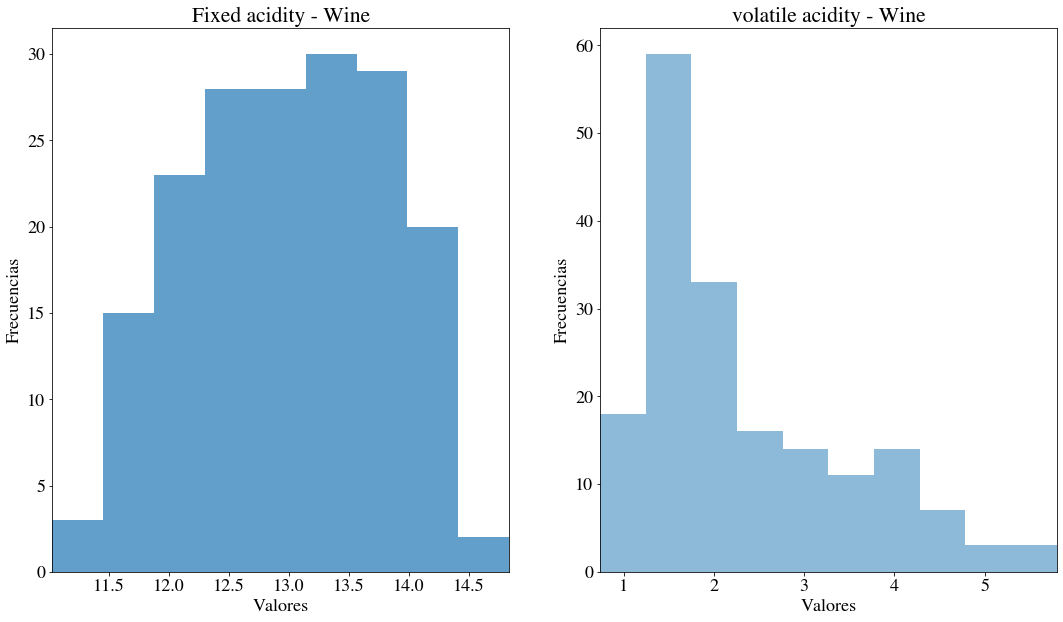

In [11]:
import matplotlib
from matplotlib import pyplot

matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

fig = pyplot.figure(figsize=(18,10))
ax = fig.add_subplot(1, 2, 1)
pyplot.hist(data_comp['fixed acidity'], bins = 'fd', alpha=0.7) # fd = regla de Freedman-Diaconis
pyplot.xlim(data_comp['fixed acidity'].min(),data_comp['fixed acidity'].max())
pyplot.xlabel('Valores')
pyplot.ylabel('Frecuencias')
pyplot.title('Fixed acidity - Wine')
ax = fig.add_subplot(1, 2, 2)
pyplot.hist(data_comp['volatile acidity'], bins = 'fd', alpha=0.5) # fd = regla de Freedman-Diaconis
pyplot.xlim(data_comp['volatile acidity'].min(),data_comp['volatile acidity'].max())
pyplot.xlabel('Valores')
pyplot.ylabel('Frecuencias')
pyplot.title('volatile acidity - Wine')
pyplot.show()

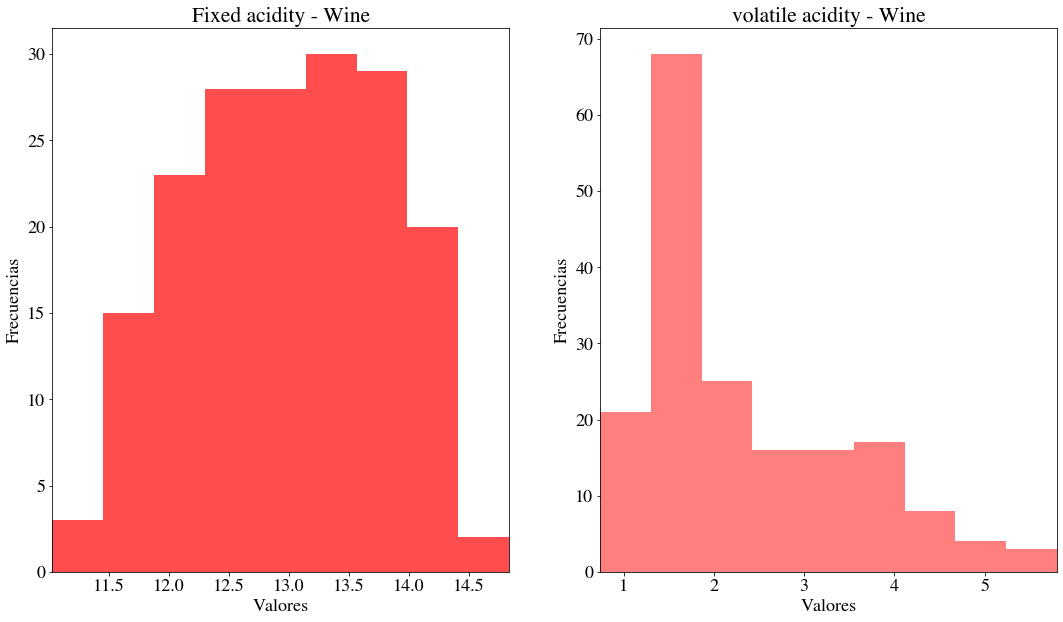

In [12]:
import matplotlib
from matplotlib import pyplot

matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

fig = pyplot.figure(figsize=(18,10))
ax = fig.add_subplot(1, 2, 1)
pyplot.hist(data_comp['fixed acidity'], bins = 'sturges', alpha=0.7, color = 'r') # sturges
pyplot.xlim(data_comp['fixed acidity'].min(),data_comp['fixed acidity'].max())
pyplot.xlabel('Valores')
pyplot.ylabel('Frecuencias')
pyplot.title('Fixed acidity - Wine')
ax = fig.add_subplot(1, 2, 2)
pyplot.hist(data_comp['volatile acidity'], bins = 'sturges', alpha=0.5, color = 'r') # sturges
pyplot.xlim(data_comp['volatile acidity'].min(),data_comp['volatile acidity'].max())
pyplot.xlabel('Valores')
pyplot.ylabel('Frecuencias')
pyplot.title('volatile acidity - Wine')
pyplot.show()

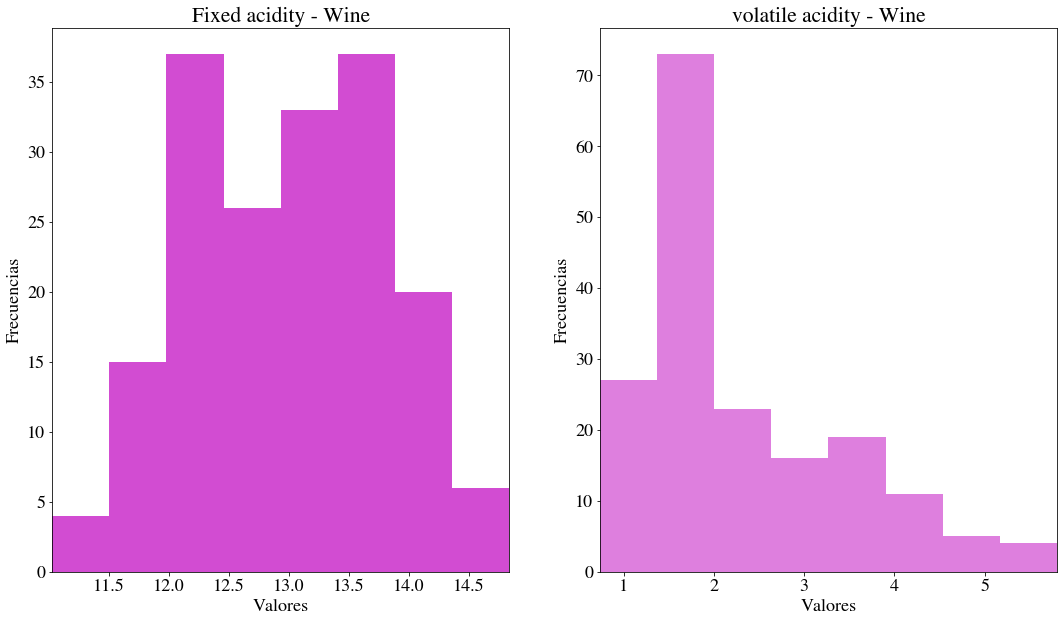

In [13]:
import matplotlib
from matplotlib import pyplot

matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

fig = pyplot.figure(figsize=(18,10))
ax = fig.add_subplot(1, 2, 1)
pyplot.hist(data_comp['fixed acidity'], bins = 'scott', alpha=0.7, color = 'm') # scott
pyplot.xlim(data_comp['fixed acidity'].min(),data_comp['fixed acidity'].max())
pyplot.xlabel('Valores')
pyplot.ylabel('Frecuencias')
pyplot.title('Fixed acidity - Wine')
ax = fig.add_subplot(1, 2, 2)
pyplot.hist(data_comp['volatile acidity'], bins = 'scott', alpha=0.5, color = 'm') # scott
pyplot.xlim(data_comp['volatile acidity'].min(),data_comp['volatile acidity'].max())
pyplot.xlabel('Valores')
pyplot.ylabel('Frecuencias')
pyplot.title('volatile acidity - Wine')
pyplot.show()

 Que sucede si se utiliza el parámetro *density* 

In [ ]:
import matplotlib
from matplotlib import pyplot

matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

fig = pyplot.figure(figsize=(18,10))
ax = fig.add_subplot(1, 2, 1)
pyplot.hist(data_comp['fixed acidity'], bins = 'scott', density = True, alpha=0.7, color = 'g') # density
pyplot.xlim(data_comp['fixed acidity'].min(),data_comp['fixed acidity'].max())
pyplot.xlabel('Valores')
pyplot.ylabel('Frecuencias')
pyplot.title('Fixed acidity - Wine')
ax = fig.add_subplot(1, 2, 2)
pyplot.hist(data_comp['volatile acidity'], bins = 'scott', density = True, alpha=0.5, color = 'g') # density
pyplot.xlim(data_comp['volatile acidity'].min(),data_comp['volatile acidity'].max())
pyplot.xlabel('Valores')
pyplot.ylabel('Frecuencias')
pyplot.title('volatile acidity - Wine')
pyplot.show()

## Estadísticos de variable nominal o categórica

Consideremos un conjunto de valores dicretos, $\lbrace v_1,\ldots, v_N \rbrace$, tal que podemos caracterizar el número de veces que en la muestra de $N$ datos aparece cada valor, $\lbrace n_1, \ldots, n_K\rbrace$, donde:

$$N = \sum_{j=1}^k n_j$$

Lo anterior indica que la suma total del número de veces que aparece uno o más valores discretos es igual al número total de muestras de los datos. Teniendo en cuenta esta característica, los estadísticos de una variable nominal $V$ son las siguientes:

**Moda:** Es el valor que aparece más veces en un conjunto de datos discretos.

$$v_j = arg\max_j\lbrace n_1, \ldots, n_j, \ldots. n_k \rbrace$$

**Media Nominal:** Es un valor que para una variable nominal dada, se obtiene para $m$ casos o sucesos observados en $N$ datos:

$$\rho = \frac{m}{N}$$

Una forma alternativa para representar $\rho$ es mediante una expresión que asigna una variable binaria con cada ejemplo de un conjunto datos:

$$\rho = \frac{1}{N}\sum_{i=1}^N v_i$$

donde $v_i = 1$ si hay correspondencia en una categoría y $v_i = 0$ en otro caso.

**Varianza Nominal:** Es un valor que estima la varianza de cada categoría:

$$\sigma^2(\rho) = \frac{1}{N}\sum_{i=1}^N (v_i - \rho) = \rho(1 - \rho)$$

Como caso curioso, si $\rho = 0.5$ entonces se obtiene la máxima varianza nominal y se puede estimar $\rho = \frac{1}{k}$, siendo $k$ es el númerop de valores que toma la variable nominal.

**Desviación estándar nominal:** Es un valor de la desviación de cada categoría:

$$\sigma(\rho) = \sqrt{\rho(1 - \rho)}$$

**Histograma para variable nominal**: Para crear una representación gráfica del histograma con variable nominal, se calcula la distribución de frecuencias de los valores en $N$ datos de for porcentual:

$$P_1 = 100\left ( \frac{n_1}{N} \right)\%;\ldots; P_k = 100\left ( \frac{n_k}{N} \right)\%$$

Por consiguiente, cada $P_1 \ldots, P_K$ tiene un valor porcentual por cada categoría.

In [ ]:
import seaborn as sns
from matplotlib import pyplot
import matplotlib

datos = sns.load_dataset("tips")
datos = datos.loc[:,['sex', 'smoker', 'day', 'time', 'size']]
display(datos)

In [ ]:
matplotlib.rcParams.update({'font.size': 20, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})
sns.catplot(x="sex", kind="count", palette="ch:.25", data = datos, height = 8, aspect = 1)
pyplot.show()

In [ ]:
matplotlib.rcParams.update({'font.size': 20, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})
sns.catplot(x="smoker", kind="count", palette="ch:.25", data = datos, height = 8, aspect = 1)
pyplot.show()

In [ ]:
matplotlib.rcParams.update({'font.size': 20, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})
sns.catplot(x="day", kind="count", palette="ch:.25", data = datos, height = 8, aspect = 1)
pyplot.show()

In [ ]:
matplotlib.rcParams.update({'font.size': 20, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})
sns.catplot(x="time", kind="count", palette="ch:.25", data = datos, height = 8, aspect = 1)
pyplot.show()

In [ ]:
matplotlib.rcParams.update({'font.size': 20, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})
sns.catplot(x="size", kind="count", palette="ch:.25", data = datos, height = 8, aspect = 1)
pyplot.show()

In [ ]:
matplotlib.rcParams.update({'font.size': 20, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})
sns.catplot(x="sex", y = "size", hue="day", kind="violin", palette="ch:.25", data = datos, height = 8, aspect = 1)
pyplot.show()

In [ ]:
import numpy as np

a = datos['sex'].value_counts(normalize = False)
m = datos.shape[0]
print("Muestras por cada categoría para una variable nominal = \n", a)
print("Número de datos = ", m)
media_nominal = a/m
varianza_nominal = media_nominal*(1 - media_nominal)
desd_nominal = np.sqrt(varianza_nominal)
print("Media nominal = \n",media_nominal)
print("Varianza nominal = \n",varianza_nominal)
print("Desviación nominal = \n",desd_nominal)

In [ ]:
d = datos.loc[:,['sex','smoker']]
L1 = d.loc[(d['sex'] == 'Male') & (d['smoker'] == 'Yes')]
L2 = d.loc[(d['sex'] == 'Female') & (d['smoker'] == 'Yes')]
n1 = L1.shape[0]
n2 = L2.shape[0]
m = datos.shape[0]
media_1 = n1/m
media_2 = n2/m
var_1 = media_1*(1 - media_1)
var_2 = media_2*(1 - media_2)
des_1 = np.sqrt(var_1)
des_2 = np.sqrt(var_2)
print("Media nominal hombres que fuman = {:.3f}".format(media_1))
print("Media nominal mujeres que fuman = {:.3f}".format(media_2))
print("Varianza nominal hombres que fuman = {:.3f}".format(var_1))
print("Varianza nominal mujeres que fuman = {:.3f}".format(var_2))
print("Desviación nominal hombres que fuman = {:.3f}".format(des_1))
print("Desviación nominal mujeres que fuman = {:.3f}".format(des_2))

In [ ]:
import pandas as pd

matplotlib.rcParams.update({'font.size': 20, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})
DATA = np.vstack([L1,L2]) # Unificar los conjuntos de datos L1 y L2
data_new = pd.DataFrame(DATA, columns = ['sex','smoker'])
sns.catplot(x="sex", kind="count", palette="ch:.25", data = data_new, height = 8, aspect = 1)
pyplot.title("Histograma de los hombres y mujeres que fuman")
pyplot.show()

# Función de distribución acumulada

Una función de distribución acumulada se establece como una relación una variable aleatoria $X$ , tal que:

$$F(X) = F_X(x) = \mathbb{P}(X \leq x)$$

donde $x$ es un valor que pertenece a $X$. Esta función cumple con tres propiedades:

1.   $\lim_{X \rightarrow -\infty} F(X) = 0$
2.   $\lim_{X \rightarrow \infty} F(X) = 1$
3.   $F(X)$ es una función creciente si $F(X) \leq F(x)$

A partir de lo anterior, se puede analizar el siguiente ejemplo:

Se lanza una moneda dos veces. Si $X$ es el número de caras obtenidas en dos lanzamientos, se considera que:

*   $s$ es un sello de la moneda.
*   $c$ es la cara de la moneda.
*   $\Omega$ es el espacio de las muestras, dado para este ejemplo como:

$$\Omega = \lbrace (c,c),(c,s),(s,c), (s,s) \rbrace$$

El estado $(s,s)$ se representa como $0$, $(c,s)$ y $(s,c)$ como $1$ y $(c,c)$ como $2$. A partir de lo anterior, se define una variable aleatoria $X = \lbrace 0,1,2 \rbrace$. Por consiguiente:

$$P(X = 0) = \frac{1}{4}$$
$$P(X = 1) = \frac{1}{2}$$
$$P(X = 2) = \frac{1}{4}$$
$$\sum_{n=0}^2 P(X_n) = \frac{1}{4} + \frac{1}{2} + \frac{1}{4} = 1$$

Al determinar la función de probabilidad acumulada, encontramos que:

$$F(0) = \mathbb{P}(X \leq 0) = \mathbb{P}(X = 0) = \frac{1}{4}$$
$$F(0.5) = \mathbb{P}(X \leq 0.5) = \mathbb{P}(X = 0.5) = \frac{1}{4}$$
$$F(1) = \mathbb{P}(X \leq 1) = \mathbb{P}(X = 0) + \mathbb{P}(X = 1) = \frac{1}{4} + \frac{1}{2} = \frac{3}{4}$$
$$F(1.5) = \mathbb{P}(X \leq 1.5) = \mathbb{P}(X = 0) + \mathbb{P}(X = 1.5) = \frac{1}{4} + \frac{1}{2} = \frac{3}{4}$$
$$F(2) = \mathbb{P}(X \leq 2) = \mathbb{P}(X = 0) + \mathbb{P}(X = 1) + \mathbb{P}(X = 2) = \frac{1}{4} + \frac{1}{2} + \frac{1}{4} = 1$$

Considerando estos cálculos, la función de distribución acumulada se define como:

$$F(x) = \begin{cases} 0 & Si\,\, x < 0\\
\frac{1}{4} & Si\,\, 0 \leq x < 1\\
\frac{3}{4} & Si\,\, 1 \leq x < 2\\
1 & Si\,\, x \geq 2\end{cases}$$

Veamos un ejemplo práctico en Python.


In [ ]:
import numpy as np
import matplotlib
from matplotlib import pyplot

matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

x = np.linspace(-0.5,2.5,200)

f = []

for n in range(len(x)):
  if x[n] < 0:
    f.append(0)
  elif x[n] >= 0 and x[n] < 1:
    f.append(0.25)
  elif x[n] >= 1 and x[n] < 2:
    f.append(0.75)
  elif x[n] >= 2:
    f.append(1)

pyplot.figure(figsize=(10,10))
pyplot.stem(x, f, linefmt='brown', markerfmt='D')
pyplot.xlabel('$x$')
pyplot.ylabel('$CDF(x)$')
pyplot.show()

#Momentos estadísticos

Los momentos estadísticos son conjuntos de parámetros estadísticos que miden una determinada distribución de probabilidad. Por lo general, hay cuatro momentos que se analizan en una distribución:

1.   **Primer Momento:** La media
2.   **Segundo Momento:** La varianza
3.   **Tercer Momento:** El sesgo. Este parámetro mide la asimentría de una distribución desde su pico, lo cual permite describir la forma de la distribución. Por lo general, si el sesgo es positivo, significa que la media es más grande que la mediana y la distribución tendra un pico con los valores más altos de probabilidad. Por el contrario, si el sesgo es negativo, entonces la media es más pequeña que la mediana y la distribución tendra un pico con los valores más bajos de probabilidad. El sesgo se determina como:

$$s = \frac{media - mediana}{desviacion}$$

4.  **Cuarto Momento:** La Curtosis. Este parámetro mide el pico de una distribución. Si la curtosis es positiva, entonces la distribución tendrá una forma delgada y puntiaguda. Si la curtosis es negativa, entonces la distribución tendrá una forma plana y amplia.

Es importante resaltar que estos momentos de las distribución pueden diferir su comportamiento de acuerdo a los parámetros propios de cada distribución de probabilidad que analizaremos más adelante. 



# Funciones de distribución discreta

## Función de distribución uniforme discreta

La función de distribución uniforme discreta, $X \sim Unid(L,H)$, es la función de distribución discreta más sencilla donde relaciona puntos extremos máximos y mínimos de la variable aleatoria $X$. De acuerdo al rango entre ambos extremos, entre más amplio su rango, los valores de probabilidad disminuye y se incrementa en caso contrario. Matemáticamente se define como:

$$P(x\vert L,H) = \frac{1}{H - L}$$

siendo $L$ y $H$ los extremos menor y superior.

La media y la varianza de esta distribución está dado por:

$$\mu = \frac{L + H}{2}$$

$$\sigma^2 = \frac{(H-L+1)^2 - 1}{12}$$

Veamos un ejemplo práctico de esta distribución.

In [ ]:
import numpy as np
from scipy.stats import randint
import matplotlib
from matplotlib import pyplot

matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

L_1,H_1 = 5,15
L_2,H_2 = 2,20
L_3,H_3 = 3,30
media_1, varianza_1,_ ,_ = randint.stats(L_1, H_1, moments='mvsk')
media_2, varianza_2,_ ,_ = randint.stats(L_2, H_2, moments='mvsk')
media_3, varianza_3,_ ,_ = randint.stats(L_3, H_3, moments='mvsk')
x = np.arange(25)

P1 = randint.pmf(x, L_1, H_1)
P2 = randint.pmf(x, L_2, H_2)
P3 = randint.pmf(x, L_3, H_3)

fig = pyplot.figure(figsize=(38,10))

ax = fig.add_subplot(1, 3, 1)
ax.stem(x, P1, linefmt='green', markerfmt='D')
pyplot.xlabel('$x$')
pyplot.ylabel('$P(x)$')
pyplot.title('Función de masa de probabilidad uniforme discreta con $L$ y $H$ = {:.2f} y {:.2f}'.format(L_1,H_1))

ax = fig.add_subplot(1, 3, 2)
ax.stem(x, P2, linefmt='blue', markerfmt='D')
pyplot.xlabel('$x$')
pyplot.ylabel('$P(x)$')
pyplot.title('Función de masa de probabilidad uniforme discreta con $L$ y $H$ = {:.2f} y {:.2f}'.format(L_2,H_2))

ax = fig.add_subplot(1, 3, 3)
ax.stem(x, P3, linefmt='red', markerfmt='D')
pyplot.xlabel('$x$')
pyplot.ylabel('$P(x)$')
pyplot.title('Función de masa de probabilidad uniforme discreta con $L$ y $H$ = {:.2f} y {:.2f}'.format(L_3,H_3))
pyplot.show()

print("Los valores de la media son = {:.3f}, {:.3f} y {:.3f}".format(media_1, media_2, media_3))
print("Los valores de la varianza son = {:.3f}, {:.3f} y {:.3f}".format(varianza_1, varianza_2, varianza_3))

## Función de distribución Bernoulli

La función de distribución Bernoulli, $X \sim Ber(\rho)$, es una distribución con dos estados, como sucede, por ejemplo, en el lanzamiento de una moneda. Si lanzamos una moneda (y la moneda no está amañada), la probabilidad que salga "cara" es $\rho_{cara} = 0.5$. Y como tiene que ser cara o sello, obtenemos:

$$P(x\vert \rho) = \begin{cases} 1 - \rho & x=0 \\
\rho & x = 1\end{cases}$$

where:

*   $\sim$ significa "es distribuido de acuerdo a"
*   $1 - \rho$ es el complemento de $\rho$, por ejemplo, la probabilidad que salga "sello", $\rho_{sello} = 1 - \rho_{cara}$
*   $\rho_{sello} + \rho_{cara} = 1$

Veamos un ejemplo práctico.

In [ ]:
from scipy.stats import bernoulli

p = 0.5
PX = bernoulli(p)
PX

Lo anterior se llama función de distribución congelado o frozen, que es una opción de Python que permite calcular cualquier valor de una distribución, para este caso, como es una distribución Bernoulli, analizamos que sucede si $x = 0$ y $x = 1$, tal y como se mencionó en la fórmula de la función de distribución Bernoulli.

In [ ]:
x = [0,1]
p_sello = PX.pmf(x[0])
p_cara = PX.pmf(x[1])
print("La probabilidad de caer sello es: {:.3f}".format(p_sello))
print("La probabilidad de caer cara es: {:.3f}".format(p_cara))

La función pmf significa *función de masa de probabilidad*. Ahora veamos el gráfico de esta distribución

In [ ]:
import numpy as np
import matplotlib
from matplotlib import pyplot

matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

pyplot.figure(figsize=(5,5))
pyplot.stem(x, [p_sello,p_cara], linefmt='brown', markerfmt='D')
pyplot.xlabel('$x$')
pyplot.ylabel('$P(x)$')
pyplot.title('Función de masa de probabilidad Bernoulli con p = {:.1f}'.format(p))
pyplot.show()

In [ ]:
sellos = PX.rvs(15)
sellos

La función rvs significa variaciones aleatorias y se utiliza para generar una secuencia aleatoria de valores entre 0 y 1.

## Función de distribución Binomial

La función de distribución binomial, $X \sim Bin(n,p)$, es una distribución que determina la probabilidad que un número determinado de *ensayos* o *pruebas* son probables casos de éxito o de fracaso. Por ejemplo consideremos las siguientes interrogantes:

*   De cada diez lanzamientos, ¿cuántas veces la moneda aterrizará con cara?
*   De los niños nacidos en un hospital determinado en un día determinado, ¿cuántos de ellos serán niñas?
*   ¿Cuántos estudiantes en un aula determinada tendrán ojos verdes?
*   ¿Cuántos mosquitos, de un enjambre, morirán cuando se les rocíe con insecticida?

Para responder a este tipo de interrogantes, consideramos $n$ como el número de experimentos repetitivos donde la probabilidad de éxito está dado por el parámetro $rho$ y la suma del número de éxitos. Este número de éxitos está representado por la variable aleatoria $X$ tal que $X = \lbrace 0,\ldots, n \rbrace$. Por consiguiente, definimos la función de masa de probabilidad, $p(x = k \vert n,\rho)$, como:

$$P(x = k \vert n,\rho) = \begin{cases} \binom{n}{k} \rho^k (1-\rho)^{n-k} & 0 \leq \rho \leq 1,\,\, n \in \mathbb{N} \\
0 & otro\,\, caso \end{cases}$$

donde:

$$\binom{n}{k} = \frac{n!}{k!(n-k)!}$$

Esta función cumple con la condición de la probabilidad total:

$$P_0 + \ldots + P_{n-1} = \sum_{i=0}^{n-1} P_i = 1$$

La media y la varianza de esta distribución están dados por:

$$\mu = n\rho$$

$$\sigma^2 = n\rho(1-\rho)$$

Veamos un ejemplo práctio de esta función.

In [ ]:
from scipy.stats import binom
import numpy as np
import matplotlib
from matplotlib import pyplot

matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

p, n = 0.5, 15
BIN = binom(n, p)
x = np.arange(15)
P = BIN.pmf(x)
media, varianza, _, _ = binom.stats(n, p, moments='mvsk')

print("La media es {:.3f}".format(media))
print("La varianza es {:.3f}".format(varianza))

pyplot.figure(figsize=(10,10))
pyplot.stem(x, P, linefmt='brown', markerfmt='D')
pyplot.xlabel('$x$')
pyplot.ylabel('$P(x)$')
pyplot.title('Función de masa de probabilidad Binomial con p = {:.2f}'.format(p))
pyplot.show()

Qué sucedería en la función de distribución para diferentes valores de $\rho$?

In [ ]:
from scipy.stats import binom
import numpy as np
import matplotlib
from matplotlib import pyplot

matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

x = np.arange(15)
p1, p2, p3 = 0.25, 0.75, 0.9
n = 15
BIN_1 = binom(n, p1)
BIN_2 = binom(n, p2)
BIN_3 = binom(n, p3)
P1 = BIN_1.pmf(x)
P2 = BIN_2.pmf(x)
P3 = BIN_3.pmf(x)

media_1, varianza_1, _, _ = binom.stats(n, p1, moments='mvsk')
media_2, varianza_2, _, _ = binom.stats(n, p2, moments='mvsk')
media_3, varianza_3, _, _ = binom.stats(n, p3, moments='mvsk')

fig = pyplot.figure(figsize=(30,10))

ax = fig.add_subplot(1, 3, 1)
ax.stem(x, P1, linefmt='green', markerfmt='D')
pyplot.xlabel('$x$')
pyplot.ylabel('$P(x)$')
pyplot.title('Función de masa de probabilidad Binomial con p = {:.2f}'.format(p1))

ax = fig.add_subplot(1, 3, 2)
ax.stem(x, P2, linefmt='blue', markerfmt='D')
pyplot.xlabel('$x$')
pyplot.ylabel('$P(x)$')
pyplot.title('Función de masa de probabilidad Binomial con p = {:.2f}'.format(p2))

ax = fig.add_subplot(1, 3, 3)
ax.stem(x, P3, linefmt='red', markerfmt='D')
pyplot.xlabel('$x$')
pyplot.ylabel('$P(x)$')
pyplot.title('Función de masa de probabilidad Binomial con p = {:.2f}'.format(p3))
pyplot.show()

print("Los valores de la media son = {:.3f}, {:.3f} y {:.3f}".format(media_1, media_2, media_3))
print("Los valores de la varianza son = {:.3f}, {:.3f} y {:.3f}".format(varianza_1, varianza_2, varianza_3))

### Test Binomial

El test binomial es una prueba que desde los datos de una muestra permite determinar si la proporción de la población para una variable binaria es igual a un valor específico. Por ejemplo, un test binomial podría ser ver si la proporción de ingenieros de una empresa tienen habilidades de programación es igual $0.65$, lo cual es el valor esperado de la media de un modelo que analiza este tipo de escenario.

El test binomial calcula la probabilidad de obtener de un tamaño de muestra específico, $n$, el número de resultados esperados, que para este caso, seria el número de ingenieros con habilidades de programación. Por lo general, en el test binomial depende del cálculo de la función de masa de probabilidad binomial, $X \sim Bin(n,\rho)$.

Veamos un ejemplo práctico de este test.


Consideremos el siguiente problema: "Una empresa de desarrollo de Software dice que no más del 25% de las pruebas de calidad del software son ineficientes. Para 15 productos de software que son analizados, se encontraron que 5 productos de software son ineficientes. No obstante, varios expertos en ingeniería de software determinaron que puede haber 50%, 75% o inclusive 90% de sofware ineficientes debido a los cambios de personal que ha sufrido la empresa en los últimos dos años. Quiénes tendrán la razón?"

In [ ]:
from scipy.stats import binom_test
import numpy as np

x = 5
p1, p2, p3, p4 = 0.25, 0.5, 0.75, 0.9
n = 15

valor_1 = binom_test(x, n, p = p1)
valor_2 = binom_test(x, n, p = p2)
valor_3 = binom_test(x, n, p = p3)
valor_4 = binom_test(x, n, p = p4)

print("Valor de la prueba binomial con p = {:.2f} es = {:.8f}".format(p1,valor_1))
print("Valor de la prueba binomial con p = {:.2f} es = {:.8f}".format(p2,valor_2))
print("Valor de la prueba binomial con p = {:.2f} es = {:.8f}".format(p3,valor_3))
print("Valor de la prueba binomial con p = {:.2f} es = {:.8f}".format(p4,valor_4))

Si consideramos un umbral de decisión de $0.05$ que es lo mismo que decir que hay 5% de desconfianza en los expertos, se determina que los expertos 1 y 2 no tienen razón en su afirmación mientras que los expertos 3 y 4 tienen razón en afirmar que entre el 75% y el 90% de los productos de software tienen problemas de clalidad.

En la unidad 3, analizaremos a profunidad los test estadísticos.

## Función de distribución binomial negativa

La función de distribución binomial negativa, $X \sim Nbin(n,\rho)$, describe una secuencia de ensayos independientes basado en la distribución Bernoulli, donde la variable aleatoria $X$ denota el ensayo para $n$ sucesos o ensayos exitosos. A diferencia de la distribución binomial, esta distribución determina una variable aleatoria que representa el número de fracasos, $Y$. Matemáticamente, esta distribución esta dada por:

$$P(y=k\vert n,p) = \binom{n+y-1}{y}\rho^n(1 - \rho)^y,\,\,\, y = \lbrace 0,1,\ldots \rbrace$$

donde:

$$\binom{n+y-1}{y} = (-1)^y \binom{-n}{y} = (-1)^y \frac{(-n)(-n-1)\cdots (-n-y+1)}{(y)(y-1)\cdots (2)(1)}$$

Otra forma alternativa de definir matemáticamente esta distribución es la siguiente:

$$P(x=k\vert n,p) = \binom{x-1}{n-1}\rho^n(1 - \rho)^{x-n},\,\,\, x = \lbrace n,n+1,\ldots \rbrace$$

La media y la varianza de esta distribución están dados por:

$$\mu = n\left( \frac{1-\rho}{\rho} \right )$$

$$\sigma^2 = \frac{n(1-\rho)}{\rho^2}$$

Veamos un ejemplo práctico de esta distribución

In [ ]:
from scipy.stats import nbinom
import numpy as np
import matplotlib
from matplotlib import pyplot

matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

p, n = 0.5, 15
NBIN = nbinom(n, p)
x = np.arange(15)
P = NBIN.pmf(x)
media, varianza, _, _ = nbinom.stats(n, p, moments='mvsk')

print("La media es {:.3f}".format(media))
print("La varianza es {:.3f}".format(varianza))

pyplot.figure(figsize=(10,10))
pyplot.stem(x, P, linefmt='brown', markerfmt='D')
pyplot.xlabel('$x$')
pyplot.ylabel('$P(x)$')
pyplot.title('Función de masa de probabilidad Binomial Negativa con p = {:.1f}'.format(p))
pyplot.show()

Qué sucedería en la función de distribución binomial negativa para diferentes valores de $\rho$?

In [ ]:
from scipy.stats import nbinom
import numpy as np
import matplotlib
from matplotlib import pyplot

matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

x = np.arange(15)
p1, p2, p3 = 0.25, 0.75, 0.9
n = 15
NBIN_1 = nbinom(n, p1)
NBIN_2 = nbinom(n, p2)
NBIN_3 = nbinom(n, p3)
P1 = NBIN_1.pmf(x)
P2 = NBIN_2.pmf(x)
P3 = NBIN_3.pmf(x)

media_1, varianza_1, _, _ = nbinom.stats(n, p1, moments='mvsk')
media_2, varianza_2, _, _ = nbinom.stats(n, p2, moments='mvsk')
media_3, varianza_3, _, _ = nbinom.stats(n, p3, moments='mvsk')

fig = pyplot.figure(figsize=(35,10))

ax = fig.add_subplot(1, 3, 1)
ax.stem(x, P1, linefmt='green', markerfmt='D')
pyplot.xlabel('$x$')
pyplot.ylabel('$P(x)$')
pyplot.title('Función de masa de probabilidad Binomial Negativa con p = {:.2f}'.format(p1))

ax = fig.add_subplot(1, 3, 2)
ax.stem(x, P2, linefmt='blue', markerfmt='D')
pyplot.xlabel('$x$')
pyplot.ylabel('$P(x)$')
pyplot.title('Función de masa de probabilidad Binomial Negativa con p = {:.2f}'.format(p2))

ax = fig.add_subplot(1, 3, 3)
ax.stem(x, P3, linefmt='red', markerfmt='D')
pyplot.xlabel('$x$')
pyplot.ylabel('$P(x)$')
pyplot.title('Función de masa de probabilidad Binomial Negativa con p = {:.2f}'.format(p3))
pyplot.show()

print("Los valores de la media son = {:.3f}, {:.3f} y {:.3f}".format(media_1, media_2, media_3))
print("Los valores de la varianza son = {:.3f}, {:.3f} y {:.3f}".format(varianza_1, varianza_2, varianza_3))

### Test Binomial Negativa

El test binomial negativa esta basado en el test Binomial estándar pero se debe considerar dos muestras: número de éxitos y número de fracasos. Veamos un ejemplo práctico de este test

Consideremos el siguiente problema: "Un ciudadano colombiano tiene un negocio de empánadas que produce 200 empanadas en tres horas. De las 200 empanadas, hay 8 empanadas deliciosas y 2 empanadas regulares por cada 10 empanadas que produce en nueve minutos. Sin embargo, en una encuesta a los consumidores, dicen que de las empanadas que comen lunes a viernes, hay aproximadamente 10% o 60% de las empanadas que tienen un sabor regular"


In [ ]:
from scipy.stats import binom_test
import numpy as np

xe, xf = 8, 2
p1, p2 = 0.1, 0.6
n = 10

valor_1 = binom_test([xe,xf], n, p = p1)
valor_2 = binom_test([xe,xf], n, p = p2)

print("Valor de la prueba binomial negativa con p = {:.2f} es = {:.8f}".format(p1,valor_1))
print("Valor de la prueba binomial negativa con p = {:.2f} es = {:.8f}".format(p2,valor_2))

Si consideramos un umbral de decisión de $0.05$, observen que el primer caso tiene un valor menor $0.05$ y por consiguiente, hay alrededor de 10% de las empanadas que pueden salir regulares. Por otra parte, el segundo caso tiene un valor mayor a $0.05$, lo cual se rechaza la hipótesis que el 60% de las empanadas salgan regulares.

## Función de distribución Geométrica

La función de distribución geométrica, $X \sim Geo(\rho)$, es un caso especial de la distribución binomial negativa cuando $n=1$. Al considerar dicha condición, la función se expresa como:

$$P(x=k \vert \rho) = \rho(1 - \rho)^{x - 1},\,\, x=\lbrace 1,2,\ldots \rbrace$$

Esta función considera $\rho$ como la probabilidad de éxitos, como en la función binomial estándar. La variable aleatoria $X$ se interpreta como el ensayo o experimento en el cual el primer éxito se presenta y por consiguiente, se aguarda a esperar si se presenta un nuevo éxito. 

La media y la varianza de esta distribución está dado por:

$$\mu = \frac{1}{\rho}$$

$$\sigma^2 = \frac{1 - \rho}{\rho^2}$$

Una característica interesante de esta distribución es una propiedad llamada **sin memoría**, que significa que la distribución geométrica olvida lo que sucedio anteriormente. 

Veamos un ejemplo práctico de dicha distribución.

In [ ]:
from scipy.stats import geom
import numpy as np
import matplotlib
from matplotlib import pyplot

matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

p = 0.5
GEO = geom(p)
x = np.arange(15)
P = GEO.pmf(x)
media, varianza, _, _ = geom.stats(p, moments='mvsk')

print("La media es {:.3f}".format(media))
print("La varianza es {:.3f}".format(varianza))

pyplot.figure(figsize=(10,10))
pyplot.stem(x, P, linefmt='brown', markerfmt='D')
pyplot.xlabel('$x$')
pyplot.ylabel('$p(x)$')
pyplot.title('Función de masa de probabilidad Geométrica con p = {:.1f}'.format(p))
pyplot.show()

Qué sucedería en la función de distribución geométrica para diferentes valores de $\rho$?

In [ ]:
from scipy.stats import geom
import numpy as np
import matplotlib
from matplotlib import pyplot

matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

x = np.arange(15)
p1, p2, p3 = 0.25, 0.75, 0.9
GEO_1 = geom(p1)
GEO_2 = geom(p2)
GEO_3 = geom(p3)
P1 = GEO_1.pmf(x)
P2 = GEO_2.pmf(x)
P3 = GEO_3.pmf(x)

media_1, varianza_1, _, _ = geom.stats(p1, moments='mvsk')
media_2, varianza_2, _, _ = geom.stats(p2, moments='mvsk')
media_3, varianza_3, _, _ = geom.stats(p3, moments='mvsk')

fig = pyplot.figure(figsize=(35,10))

ax = fig.add_subplot(1, 3, 1)
ax.stem(x, P1, linefmt='green', markerfmt='D')
pyplot.xlabel('$x$')
pyplot.ylabel('$P(x)$')
pyplot.title('Función de masa de probabilidad Geométrica con p = {:.2f}'.format(p1))

ax = fig.add_subplot(1, 3, 2)
ax.stem(x, P2, linefmt='blue', markerfmt='D')
pyplot.xlabel('$x$')
pyplot.ylabel('$P(x)$')
pyplot.title('Función de masa de probabilidad Geométrica con p = {:.2f}'.format(p2))

ax = fig.add_subplot(1, 3, 3)
ax.stem(x, P3, linefmt='red', markerfmt='D')
pyplot.xlabel('$x$')
pyplot.ylabel('$P(x)$')
pyplot.title('Función de masa de probabilidad Geométrica con p = {:.2f}'.format(p3))
pyplot.show()

print("Los valores de la media son = {:.3f}, {:.3f} y {:.3f}".format(media_1, media_2, media_3))
print("Los valores de la varianza son = {:.3f}, {:.3f} y {:.3f}".format(varianza_1, varianza_2, varianza_3))

## Función de distribución Hipergeométrica

La distribución de masa de probabilidad hipergeométrica, $X \sim HGeo(n,M,N)$, es una función que considera el número de posbiles maneras de obtener el tamaño de la muestra $\binom{N}{n}$, siendo que se considere un número de fracasos $M$ y como la variable aleatoria $X$ puede ser muestreado como $\binom{M}{x}$, de diferentes maneras. La función de masa está dado por:

$$P(X = k\vert n,M.N) = \frac{\binom{M}{x}\binom{N-M}{n-x}}{\binom{N}{n}}$$

donde $x$ es un número entero que está limitado en un rango entre $\max \lbrace 0, n-N+M\rbrace$ y $\min\lbrace n,M\rbrace$.

La media y la varianza de esta distribución está dado por:

$$\mu = n\left (\frac{M}{N} \right)$$

$$\sigma^2 = n \left(\frac{M}{N}\right) \left(\frac{N-M}{N}\right) \left(\frac{N-n}{N-1}\right)$$

Veamos un ejemplo práctico de esta distribución.

Consideremos el siguiente problema: "En el restaurante de Pino Prestanizzi hacen 200 pizzas por día. De estas 200 pizzas, hay 20 pizzas que tienen tomates Milano dañados. Si consideramos una muestra aleatoria de $n$ pizzas, denotamos $X$ como el número de pizzas con tomates Milano de baja calidad obtenidos desde la muestra $n$. Pino Prestanizzi, con la rabia característica que lo conocen sus empleados, desea saber si con $n = 10$ pizzas, hay alguna pizza con tomates de mala calidad".

In [ ]:
from scipy.stats import hypergeom
import numpy as np
import matplotlib
from matplotlib import pyplot

matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

N = 200
M = 20
n = 10
x = np.arange(15)
HYG = hypergeom(N,M,n)
P = HYG.pmf(x)

media = hypergeom.mean(N,M,n)
varianza = hypergeom.var(N,M,n)

print("La media es {:.3f}".format(media))
print("La varianza es {:.3f}".format(varianza))

pyplot.figure(figsize=(10,10))
pyplot.stem(x, P, linefmt='brown', markerfmt='D')
pyplot.xlabel('$x$')
pyplot.ylabel('$P(x)$')
pyplot.title('Función de masa de probabilidad Hipergeométrica')
pyplot.show()

In [ ]:
P_pizza_defectosa = np.max(P)
P_pizza_defectosa 

In [ ]:
x_pizza_defectuosa = np.argmax(P)
x_pizza_defectuosa

Para el ejemplo anterior, efectivamente, hay una pizza (x = 1), que tiene tomate Milano de mala calidad con una probabilidad de $P(x = 1) = 0.397$

## Función de distribución de probabilidad Poisson

La distribución de probabilidad Poisson, $X \sim Poi(\lambda)$, es similar a la distribución binomial donde se analiza como el número de veces que ocurre un evento en un periodo de espacio o tiempo se puede presentar. A diferencia de las anteriores distribuciones, está distribución no tiene un valor total de muestras $n$, solamente está definido por un único parámetro que llamaremos $\lambda$.

Las siguientes preguntas pueden ser respondidas con la distribución de Poisson:

*   ¿Cuántos conejitos me encontraré en mi camino a casa?
*   ¿Cuántos ancianos serán atendidos en la UCI hoy?
*   ¿Cuántos productos venderé después de emitir un nuevo anuncio en Facebook?
*   ¿Cuántas caídas de servicio celular habrá por cada 1000 llamadas que se presentá en la estación central por cada minuto?

Para este tipo de distribución, la variable aleatoria $X$ considera el número de eventos que puede tomar cualquier valor entero no negativo, es decir, $X = \lbrace 1,2,\ldots \rbrace$. Por ejemplo, podría hacer una llamada por celular y que no se caiga la llamada (en términos coloquiales). Pero se puede presentar el caso que se corte la llamada cuando lleve un minuto de servicio del operador móvil. 

Matemáticamente, la distribución de masa de probabilidad Poisson se expresa como:

$$P(x = k\vert \lambda) = \frac{\exp(-\lambda)\lambda^x}{x!}$$

A diferencia del parámetro $\rho$ de la distribución Binomial, el parámetro $\lambda$ representa el promedio o número experado de eventos que ocurrirá en un evento o suceso.

Una caracteristica curiosa de esta distribución es que la media y la varianza son iguales a $\lambda$, es decir, $\mu = \sigma^2 = \lambda$.

Veamos un ejemplo práctico de esta distribución.

Consideremos el siguiente problema: "La empresa Hughes Net está monitoreando la estabilidad de la velocidad del internet satelital a los usuarios de los corregimientos más cercanos a Medellin. Según sus resultados, para 10 usuarios de un corregimiento tiene una estimación entre 2 y 5 usuarios que tengan una baja velocidad del internet entre las 10 am y las 11 am de los días martes y miércoles. Por consiguiente, se desea conocer la mayor probabilidad que la velocidad tenga una disminución drástica a ese grupo de usuarios".

In [ ]:
from scipy.stats import poisson
import numpy as np
import matplotlib
from matplotlib import pyplot

matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

lamda_1, lamda_2 = 2, 5
x = np.arange(10)
POI_1 = poisson(lamda_1)
POI_2 = poisson(lamda_2)
P1 = POI_1.pmf(x)
P2 = POI_2.pmf(x)

media_1 = poisson.mean(lamda_1)
media_2 = poisson.mean(lamda_2)
varianza_1 = poisson.mean(lamda_1)
varianza_2 = poisson.mean(lamda_2)

fig = pyplot.figure(figsize=(20,10))

ax = fig.add_subplot(1, 2, 1)
ax.stem(x, P1, linefmt='red', markerfmt='D')
pyplot.xlabel('$x$')
pyplot.ylabel('$P(x)$')
pyplot.title('Función de masa de probabilidad Poisson con $\lambda$ = {:.2f}'.format(lamda_1))

ax = fig.add_subplot(1, 2, 2)
ax.stem(x, P2, linefmt='blue', markerfmt='D')
pyplot.xlabel('$x$')
pyplot.ylabel('$P(x)$')
pyplot.title('Función de masa de probabilidad Poisson con $\lambda$ = {:.2f}'.format(lamda_2))

print("Los valores de la media son {:.3f} y {:.3f}".format(media_1, media_2))
print("Los valores de la covarianza son {:.3f} y {:.3f}".format(varianza_1, varianza_2))

Cuando $\lambda = 2$, se observa que los usuarios 1 y 2 tienen mayor probabilidad que se reduzca la velocidad del internet. Por otra parte, si $\lambda = 5$, los usuarios 4 y 5 tienen mayor probabilidad con respecto a los demás usuarios que se reduzca la velocidad del internet pero con valor de probabilidad más bajo en comparación con el caso de $\lambda = 2$.

# Funciones de distribución continua

Supongamos que la variable aleatoria $X$ es continuo sobre los posbiles valores de $x$. Definimos la **función de densidad de probabilidad** como una distribución continua, $f(x)$, tal que para un rango $\lbrack a,b \rbrack$ está definido como:

$$f(x) = \mathbb{P}(X \in \lbrack a, b \rbrack) = \int_a^b f(x)dx$$

Obviamente, para un rango $R_x = \lbrack a,b \rbrack$, decimos que para una distribución con una variable $s$ definimos:

$$\int_{R_x} f(s)ds = 1$$

A partir de lo anterior, se define la **función de densidad acumulada**, que es un nombre especial para las probabilidades acumuladas de una función continua de un evento, $P(X < x)$.

De forma general, la función de densidad acumulada está dado por:

$$P(X < z) = \int_{-\infty}^x f(s)ds$$

## Función de distribución Uniforme

La distribución de densidad de probabilidad uniforme, $X \sim Unif(a,b)$, es una distribución sobre el intervalor $\lbrack a,b \rbrack$, tal que $b > 0$. Si $a,b \in \mathbb{R^+}$, para cualesquiera números reales, la función está dada por:

$$f(x;a,b) = \frac{1}{b-a}, \,\, a\leq x \leq b,\,\, siendo\,\, b>a $$

La media y la varianza de esta distribución están dado por:

$$\mu = \frac{a+b}{2}$$

$$\sigma^2 = \frac{(b-a)^2}{12}$$

Veamos un ejemplo práctico de esta distribución.

Consideremos el siguiente problema: "En una agencia de seguridad industrial, contrató a un grupo de PhDs de una prestigiosa universidad para analizar el diseño de un switch que genera señales aleatorias cuya trayectoria es uniformemente distribuido sobre un intervalo entre $0$ y $1$. La agencia está interesada en calcular la probabilidad que la trayectoria cae en un intervalo entre $0.3$ y $0.61$".

In [ ]:
from scipy.stats import uniform
import numpy as np
import matplotlib
from matplotlib import pyplot

matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

a,b = 0.3,0.61
media = (a+b)/2
varianza = (b-a)**2/12
media_u,varianza_u,_,_ = uniform.stats(loc = media, scale = varianza, moments = 'mvsk')
print("La media es = {:.3f}".format(media_u))
print("La varianza es = {:.9f}".format(varianza_u))

x = np.linspace(uniform.ppf(0.01), uniform.ppf(0.99), 110)
UNIF = uniform()
P = UNIF.pdf(x)

pyplot.figure(figsize=(10,10))
pyplot.plot(x, P, 'b-', lw = 5, alpha = 0.6, label='pdf uniforme')
pyplot.hist(uniform.rvs(size = 110), density=True, histtype='stepfilled', alpha=0.5) # rvs significa variable aleatoria
pyplot.xlabel('$x$')
pyplot.ylabel('$f(x)$')
pyplot.axis([a,b,0,1.02])
pyplot.title('Función de densidad de probabilidad uniforme')
pyplot.show()

In [ ]:
DIF = UNIF.cdf(b) - UNIF.cdf(a) # cdf es la función de densidad acumulada
print("Valor de la trayectoria donde hay mayor probabilidad que se active el switch es = {:.3f}".format(DIF))

## Función de distribución Gaussiana

La función de densidad probabilidad Gaussiana, $X \sim Gauss(\mu,\sigma^2)$, es una función que tiene la siguiente expresión:

$$f(x;\mu,\sigma) = \frac{1}{\sqrt{2\pi}\sigma} \exp \left( -\frac{(x-\mu)^2}{\sigma^2} \right )$$

donde $\mu$, $\sigma$ ($\sigma > 0$) y $-\infty < x < \infty$.

Esta función de densidad de probabilidad está sujeto a las siguientes propiedades:

*Propiedad 1:*

$f(x;\mu,\sigma)$ es simétrico en términos de $x = \mu$. En otras palabras, se dice que $f(\mu - x) = f(\mu + x)$

*Propiedad 2:*

$f(x;\mu,\sigma)$ tiene una simetría central para un punto con coordenadas $(\mu, 0.5)$. Lo anterior permite establecer que $f(\mu - x) = 1 - f(\mu + x)$

*Propiedad 3:*

La esperanza y la varianza de $X$ son $\mathbb{E}\lbrack X \rbrack = \mu$ y $\mathbb{V}\lbrack X \rbrack = \sigma^2$. La media determina el punto central, mientras que la desviación estándar determina la inclinación.

Por otra parte, la variable aleatoria $X$ está sujeto a una distribución normal con parámetro $\mu$ y $\sigma$, si $\mu = 0$ y $\sigma = 1$, lo cual se genera la **distribución normal estándar o Z**. Lo anterior es una forma de *estandarizar* o *tipificar* las variables aleatorias, lo cual se mide el desplazamiento de la función con respecto a $\mu$ en unidades de desviación estándar $\sigma$:

$$z_i = \frac{y_i - \bar{y}}{\sigma_i}$$

donde $\bar{y} = \frac{1}{N}\sum_{i=1}^N y_i$ es el estadístico de media, $y_i$ es una muestra aleatoria de $N$ datos de la población, es decir, $i = \lbrace 1, \ldots, N \rbrace$, y $\sigma_i$ es la desviación estándar de una muestra poblacional. Por consiguiente, la función se expresa en término de $z$ como:

$$f(z) = \frac{1}{\sqrt{2\pi}} \exp \left( -\frac{1}{2} z^2 \right )$$

donde esta distribución coinciden con la media y la mediana en $0$ y $f(z)$ permite disponer del valor de la distribución de probabilidad bajo el área de la curva para cualquier valor de de la función estándar.

A partir de la función de distribución normal estándar, surge una cuarta propiedad de la función Gaussiana:

*Propiedad 4:*

$$\mathbb{P}(\mu - 3\sigma \leq X \leq \mu + 3\sigma) = 0.9973$$

Esta propiedad menciona que si la variable aleatoria esta sujeto a una distribución normal, entonces el $99.73\%$ de sus valores estarán localizados en el intervalo con centro $\mu$ y longitud o escala $3\sigma$. Lo anterior se denomina como el **principio $3\sigma$**, el cual es ampliamente aplicado en estadística.

Veamos varios ejemplo prácticos de está importante distribución.


In [ ]:
from scipy.stats import norm
import numpy as np
import matplotlib
from matplotlib import pyplot

x = np.arange(-3,3.1,0.001)
f = norm.pdf(x) # loc = media = 0 y scale = varianza = 1 
pyplot.figure(figsize=(10,10))
pyplot.plot(x, f, 'b-', lw = 5, alpha = 0.6, label='pdf Gaussiano')
pyplot.hist(norm.rvs(size = 1000), density=True, histtype='stepfilled', alpha=0.5) # rvs significa variable aleatoria
pyplot.xlabel('$x$')
pyplot.ylabel('$f(x)$')
pyplot.title('Función de densidad de probabilidad Gaussiana')
pyplot.show()

In [ ]:
from scipy.stats import norm
import numpy as np
import matplotlib
from matplotlib import pyplot

matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

z = np.arange(-4.1,4.1, 0.01)
z1 = np.arange(0,4.02, 0.01)
z2 = np.arange(-1.96,1.96, 0.01)
z3 = np.arange(-3,3, 0.01)

P = norm.pdf(z)
P1 = norm.pdf(z1)
P2 = norm.pdf(z2)
P3 = norm.pdf(z3)

fig = pyplot.figure(figsize=(28,28))
ax = fig.add_subplot(3, 3, 1)
pyplot.plot(z, P, 'b-', lw = 5, alpha = 0.6)
pyplot.fill_between(z1,P1)
pyplot.xlabel('$0 \leq z \leq 4.02$')
pyplot.ylabel('$f(z)$')

ax = fig.add_subplot(3, 3, 2)
pyplot.plot(z, P, 'b-', lw = 5, alpha = 0.6)
pyplot.fill_between(z2,P2)
pyplot.xlabel('$-1.96 \leq z \leq 1.96$')
pyplot.ylabel('$f(z)$')

ax = fig.add_subplot(3, 3, 3)
pyplot.plot(z, P, 'b-', lw = 5, alpha = 0.6)
pyplot.fill_between(z3,P3)
pyplot.xlabel('$-3 \leq z \leq 3$')
pyplot.ylabel('$f(z)$')
pyplot.show()

Si la media es $115$ y la desviación estándar es $20$ para una población con distribución normal , podemos realizar el siguiente análisis práctico

In [ ]:
from scipy.stats import norm
import numpy as np
import matplotlib
from matplotlib import pyplot

matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

x = np.arange(25,200, 0.001)
P = norm.pdf(x, loc = 115, scale = 20)

pyplot.figure(figsize=(10,10))
pyplot.plot(x, P, 'b-', lw = 5, alpha = 0.6, label='pdf Gaussiano')
pyplot.hist(norm.rvs(size = 1000, loc = 115, scale = 20), density=True, histtype='stepfilled', alpha=0.5) # rvs significa variable aleatoria
pyplot.xlabel('$x$')
pyplot.ylabel('$f(x)$')
pyplot.title('Función de densidad de probabilidad Gaussiana para una población')
pyplot.show()

In [ ]:
print("La probabilidad de observar valores inferiores a 70 es = {:.6f}".format(norm.cdf((70-115)/20, loc = 0, scale = 1)))

In [ ]:
print("La probabilidad de observar valores superiores a 150 es = {:.6f}".format(1 - norm.cdf((150-115)/20, loc = 0, scale = 1)))

In [ ]:
print("La probabilidad de observaciones en el intervalo entre 90 y 130 es = {:.6f}".format(norm.cdf((130-115)/20, loc = 0, scale = 1) - norm.cdf((90-115)/20, loc = 0, scale = 1)))

Cuáles son los intervalos simétricos tiene el $80\%$ y el $95\%$ de las observaciones?

In [ ]:
from scipy.stats import norm
import numpy as np
import matplotlib
from matplotlib import pyplot

matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

zz = np.arange(-3,3, 0.001)
PP = norm.cdf(zz, loc = 0, scale = 1)

pyplot.figure(figsize=(10,10))
pyplot.plot(zz, PP, 'b-', lw = 5, alpha = 0.6, label='pdf Gaussiano')
pyplot.xlabel('$z$')
pyplot.ylabel('$cdf(z)$')
pyplot.title('Función densidad acumulada normal o cdf Gaussiana')
pyplot.show()

Por lo general, el $80\%$ se determina en la curva de la cdf Gaussiana con $a = 0.1$ y el $95\%$ es $a = 0.025$

$$a_1 = \frac{1 - F}{2} = \frac{1 - 0.8}{2} = 0.1$$

$$a_2 = \frac{1 - F}{2} = \frac{1 - 0.95}{2} = 0.025$$

In [ ]:
POS1 = np.min(np.where(PP >= 0.1))
POS2 = np.min(np.where(PP >= 0.025))
z1 = np.abs(zz[POS1])
z2 = np.abs(zz[POS2])
print("a(0.1) = z1 = {:.2f}".format(z1))
print("a(0.025) = z2 = {:.2f}".format(z2))

In [ ]:
from scipy.stats import norm
import numpy as np
import matplotlib
from matplotlib import pyplot

matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

z = np.arange(-3,3, 0.001)
zz1 = np.arange(-z1,z1, 0.001)
zz2 = np.arange(-z2,z2, 0.001)

P = norm.pdf(z)
P1 = norm.pdf(zz1)
P2 = norm.pdf(zz2)

fig = pyplot.figure(figsize=(15,15))
ax = fig.add_subplot(2, 2, 1)
pyplot.plot(z, P, 'b-', lw = 5, alpha = 0.6)
pyplot.fill_between(zz1,P1)
pyplot.xlabel('$-{:.2f} \leq z \leq {:.2f}$'.format(z1,z1))
pyplot.ylabel('$f(z)$')

ax = fig.add_subplot(2, 2, 2)
pyplot.plot(z, P, 'b-', lw = 5, alpha = 0.6)
pyplot.fill_between(zz2,P2)
pyplot.xlabel('$-{:.2f} \leq z \leq {:.2f}$'.format(z2,z2))
pyplot.ylabel('$f(z)$')
pyplot.show()

In [ ]:
from scipy.stats import norm
import numpy as np
import matplotlib
from matplotlib import pyplot

matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

media = 115 
desv_std = 20
X11 = media - z1*desv_std
X12 = media + z1*desv_std
X21 = media - z2*desv_std
X22 = media + z2*desv_std

x = np.arange(25,200, 0.001)
x1 = np.arange(X11,X12, 0.001)
x2 = np.arange(X21,X22, 0.001)

P = norm.pdf(x, loc = 115, scale = 20)
P1 = norm.pdf(x1, loc = 115, scale = 20)
P2 = norm.pdf(x2, loc = 115, scale = 20)

fig = pyplot.figure(figsize=(15,15))
ax = fig.add_subplot(2, 1, 1)
pyplot.plot(x, P, 'r-', lw = 5, alpha = 0.6, label='pdf Gaussiano')
pyplot.fill_between(x1,P1)
pyplot.xlabel('$x$')
pyplot.ylabel('$f(x)$')
pyplot.title('Función de densidad de probabilidad Gaussiana para una población con intervalos $80\%$ de las observaciones [{:.2f}, {:.2f}]'.format(X11,X12))

ax = fig.add_subplot(2, 1, 2)
pyplot.plot(x, P, 'm-', lw = 5, alpha = 0.6, label='pdf Gaussiano')
pyplot.fill_between(x2,P2)
pyplot.xlabel('$x$')
pyplot.ylabel('$f(x)$')
pyplot.title('Función de densidad de probabilidad Gaussiana para una población con intervalos $95\%$ de las observaciones [{:.2f}, {:.2f}]'.format(X21,X22))
pyplot.show()

## Función de distribución Gamma $(\Gamma)$

La función de densidad de probabilidad Gamma,$X \sim \Gamma(\alpha, \lambda)$, es una distribución para variables aleatorias *np-negativas*, donde tiene dos parámetros $\lambda > 0$ y $\alpha > 0$, y una función gamma $\Gamma(z)$, la distribución de densidad de probabilidad $f(x)$ está dado por:

$$f(x; \alpha, \lambda) = \begin{cases} \frac{\lambda^\alpha}{\Gamma(\alpha)}x^{\alpha - 1} & Si\,\, x \geq 0 \\ 0 & Si\,\, x < 0 \end{cases}$$

donde $\Gamma(\alpha)$ es una función Gamma que normaliza la función de densidad de probabilidad para asegurar que $0 \leq f(x; \alpha, \lambda) \leq 1$.

La media y la varianza de esta distribución está dado por:

$$\mu = \frac{\alpha}{\lambda}$$

$$\sigma^2= \frac{\alpha}{\lambda^2}$$

Veamos un ejemplo práctico de esta distribución

In [ ]:
from scipy.stats import gengamma
import numpy as np
import matplotlib
from matplotlib import pyplot

a1, a2, a3 = 1, 2, 1
L1, L2, L3 = 2, 2, 1

media_1, varianza_1, _, _ = gengamma.stats(a1, L1, moments='mvsk')
media_2, varianza_2, _, _ = gengamma.stats(a2, L2, moments='mvsk')
media_3, varianza_3, _, _ = gengamma.stats(a3, L3, moments='mvsk')

print("Los valores de la media son {:.3f}, {:.3f} y {:.3f}".format(media_1, media_2, media_3))
print("Los valores de la covarianza son {:.3f}, {:.3f} y {:.3f}".format(varianza_1, varianza_2, varianza_3))

x = np.arange(0,5,0.001)
f1 = gengamma.pdf(x,a1,L1)
f2 = gengamma.pdf(x,a2,L2)
f3 = gengamma.pdf(x,a3,L3)

fig = pyplot.figure(figsize=(30,18))
ax = fig.add_subplot(3, 3, 1)
pyplot.plot(x, f1, 'b-', lw = 5, alpha = 0.6)
pyplot.xlabel('$x$')
pyplot.ylabel('$f(x)$')
pyplot.title('PDF Gamma con alpha y $\lambda$ = [{:.2f}, {:.2f}]'.format(a1,L1))

ax = fig.add_subplot(3, 3, 2)
pyplot.plot(x, f2, 'r-', lw = 5, alpha = 0.6)
pyplot.xlabel('$x$')
pyplot.ylabel('$f(x)$')
pyplot.title('PDF Gamma con alpha y $\lambda$ = [{:.2f}, {:.2f}]'.format(a2,L2))

ax = fig.add_subplot(3, 3, 3)
pyplot.plot(x, f3, 'g-', lw = 5, alpha = 0.6)
pyplot.xlabel('$x$')
pyplot.ylabel('$f(x)$')
pyplot.title('PDF Gamma con alpha y $\lambda$ = [{:.2f}, {:.2f}]'.format(a3,L3))
pyplot.show()

## Función de distribución Weibull

---



La función de densidad Weibull, $X \sim Wei(\beta, \gamma, \eta)$, es una función que contiene tres parámetros, $\beta, \gamma, \eta$, donde $\beta$ es el parámetro de la forma de la función o **envolvente Weibull**, $\gamma$ es el parámetro de localización (relacionado con la media) y $\eta$ es el parámetro de escala (relacionado con la varianza):

$$f(x;\beta, \gamma, \eta) = \frac{\beta}{\eta} \left( \frac{x - \gamma}{\eta}\right)^{\beta - 1} \exp\left\lbrack- \left( \frac{x - \gamma}{\eta} \right)\right\rbrack^\beta$$

Por lo general, $x \geq \gamma$, $\beta > 0$, $\eta > 0$, $-\infty < \gamma < +\infty$. En la práctica, $\gamma = 0$ para facilitar el uso de esta función y reducir la cantidad de parámetros. 

La media y la varianza de esta distribución está dado por:

$$\mu = \eta \cdot\Gamma\left( 1 + \frac{1}{\beta}\right)$$

$$\sigma^2 = \eta^2 \left \lbrack \Gamma \left(1 + \frac{2}{\beta}\right ) - \left ( \Gamma\left ( 1 + \frac{1}{\beta} \right) \right)^2 \right\rbrack$$

Como pueden observar el cálculo de ambos estadísticos es complejo debido a la dependencia de una función $\Gamma$. Sin embargo, se puede facilitar el análisis de esta función de densidad de probabilidad, considerando dos interpretaciones que se explicarán a continuación:

### Función de distribución Weibull mínimo

La función Weibull mínimo, $X \sim Weimin(\beta)$, es una aproximación basado en la teoría del valor extremo que limita la distribución a una escala mínima. 

$$f(x;\beta) = \beta\cdot x^{\beta - 1} \exp(-x^\beta)$$

Para esta función, $\beta$ cambia la forma de la envolvente de la función. Veamos un ejemplo práctico de esta distribución.

In [ ]:
from scipy.stats import weibull_min
import numpy as np
import matplotlib
from matplotlib import pyplot

matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

beta = 1,1.2,1.5,2

media_1, varianza_1, _, _ = weibull_min.stats(c = beta[0], moments = 'mvsk')
media_2, varianza_2, _, _ = weibull_min.stats(c = beta[1], moments = 'mvsk')
media_3, varianza_3, _, _ = weibull_min.stats(c = beta[2], moments = 'mvsk') 
media_4, varianza_4, _, _ = weibull_min.stats(c = beta[3], moments = 'mvsk')

print("la media y la varianza con beta = {:.2f} son = {:.3f} y {:.3f}".format(beta[0], media_1, varianza_1))
print("la media y la varianza con beta = {:.2f} son = {:.3f} y {:.3f}".format(beta[1], media_2, varianza_2))
print("la media y la varianza con beta = {:.2f} son = {:.3f} y {:.3f}".format(beta[2], media_3, varianza_3))
print("la media y la varianza con beta = {:.2f} son = {:.3f} y {:.3f}".format(beta[3], media_4, varianza_4))

x1 = np.linspace(weibull_min.ppf(0.01, beta[0]), weibull_min.ppf(0.99, beta[0]), 1000)
x2 = np.linspace(weibull_min.ppf(0.01, beta[1]), weibull_min.ppf(0.99, beta[1]), 1000)
x3 = np.linspace(weibull_min.ppf(0.01, beta[2]), weibull_min.ppf(0.99, beta[2]), 1000)
x4 = np.linspace(weibull_min.ppf(0.01, beta[3]), weibull_min.ppf(0.99, beta[3]), 1000)

f1 = weibull_min.pdf(x1, beta[0])
f2 = weibull_min.pdf(x2, beta[1])
f3 = weibull_min.pdf(x3, beta[2])
f4 = weibull_min.pdf(x4, beta[3])

fig = pyplot.figure(figsize=(30,18))
ax = fig.add_subplot(4, 4, 1)
pyplot.plot(x1, f1, 'b-', lw = 5, alpha = 0.6)
pyplot.xlabel('$x$')
pyplot.ylabel('$f(x)$')
pyplot.title('Weibull Mínumo con beta = {:.2f}'.format(beta[0]))

ax = fig.add_subplot(4, 4, 2)
pyplot.plot(x2, f2, 'r-', lw = 5, alpha = 0.6)
pyplot.xlabel('$x$')
pyplot.ylabel('$f(x)$')
pyplot.title('Weibull Mínumo con beta = {:.2f}'.format(beta[1]))

ax = fig.add_subplot(4, 4, 3)
pyplot.plot(x3, f3, 'g-', lw = 5, alpha = 0.6)
pyplot.xlabel('$x$')
pyplot.ylabel('$f(x)$')
pyplot.title('Weibull Mínumo con beta = {:.2f}'.format(beta[2]))

ax = fig.add_subplot(4, 4, 4)
pyplot.plot(x4, f4, 'm-', lw = 5, alpha = 0.6)
pyplot.xlabel('$x$')
pyplot.ylabel('$f(x)$')
pyplot.title('Weibull Mínumo con beta = {:.2f}'.format(beta[3]))
pyplot.show()

### Función de distribución Weibull máximo

La función Weibull máxima, $X \sim Weimax(\beta)$, es una función que considera la teoría del valor extremo para limitar la distribución a una escala máxima. 

$$f(x;\beta) = \beta(-x)^{\beta - 1} \exp(-(-x)^\beta)$$

Al igual que en Weibull mínimo, $\beta$ cambia la forma de la envolvente de la función.

Veamos un ejemplo práctico de esta función.

In [ ]:
from scipy.stats import weibull_max
import numpy as np
import matplotlib
from matplotlib import pyplot

matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

beta = 1,1.2,1.5,2

media_1, varianza_1, _, _ = weibull_max.stats(c = beta[0], moments = 'mvsk')
media_2, varianza_2, _, _ = weibull_max.stats(c = beta[1], moments = 'mvsk')
media_3, varianza_3, _, _ = weibull_max.stats(c = beta[2], moments = 'mvsk') 
media_4, varianza_4, _, _ = weibull_max.stats(c = beta[3], moments = 'mvsk')

print("la media y la varianza con beta = {:.2f} son = {:.3f} y {:.3f}".format(beta[0], media_1, varianza_1))
print("la media y la varianza con beta = {:.2f} son = {:.3f} y {:.3f}".format(beta[1], media_2, varianza_2))
print("la media y la varianza con beta = {:.2f} son = {:.3f} y {:.3f}".format(beta[2], media_3, varianza_3))
print("la media y la varianza con beta = {:.2f} son = {:.3f} y {:.3f}".format(beta[3], media_4, varianza_4))

x1 = np.linspace(weibull_max.ppf(0.01, beta[0]), weibull_max.ppf(0.99, beta[0]), 1000)
x2 = np.linspace(weibull_max.ppf(0.01, beta[1]), weibull_max.ppf(0.99, beta[1]), 1000)
x3 = np.linspace(weibull_max.ppf(0.01, beta[2]), weibull_max.ppf(0.99, beta[2]), 1000)
x4 = np.linspace(weibull_max.ppf(0.01, beta[3]), weibull_max.ppf(0.99, beta[3]), 1000)

f1 = weibull_max.pdf(x1, beta[0])
f2 = weibull_max.pdf(x2, beta[1])
f3 = weibull_max.pdf(x3, beta[2])
f4 = weibull_max.pdf(x4, beta[3])

fig = pyplot.figure(figsize=(30,18))
ax = fig.add_subplot(4, 4, 1)
pyplot.plot(x1, f1, 'b-', lw = 5, alpha = 0.6)
pyplot.xlabel('$x$')
pyplot.ylabel('$f(x)$')
pyplot.title('Weibull Máximo con beta = {:.2f}'.format(beta[0]))

ax = fig.add_subplot(4, 4, 2)
pyplot.plot(x2, f2, 'r-', lw = 5, alpha = 0.6)
pyplot.xlabel('$x$')
pyplot.ylabel('$f(x)$')
pyplot.title('Weibull Máximo con beta = {:.2f}'.format(beta[1]))

ax = fig.add_subplot(4, 4, 3)
pyplot.plot(x3, f3, 'g-', lw = 5, alpha = 0.6)
pyplot.xlabel('$x$')
pyplot.ylabel('$f(x)$')
pyplot.title('Weibull Máximo con beta = {:.2f}'.format(beta[2]))

ax = fig.add_subplot(4, 4, 4)
pyplot.plot(x4, f4, 'm-', lw = 5, alpha = 0.6)
pyplot.xlabel('$x$')
pyplot.ylabel('$f(x)$')
pyplot.title('Weibull Máximo con beta = {:.2f}'.format(beta[3]))
pyplot.show()

# Teorema del límite central

El teorema del límite central muestra las razones por la cual se generan, por ejemplo, una distribución Gaussiana o Normal. En otras palabras, **determina si el límite de las distribuciones que mediante una *suma* de variables aleatorias son distribuciones normales o Gaussianas**.

Por lo general, hay muchos problemas que pueden ser resueltos con la distribución límite de la suma de variables aleatorias independientes (tal y como se mostro en el espacio de probabilidad), el cual lo denotamos como $\sum_{n=1}^N X_n$. Con el fin de evitar la obtención de esperanzas infinitas y varianzas de variedades aleatorias diferentes entre sí, es necesario normalizar $\sum_{n=1}^N X_n$. Para normarlizar la suma, es necesario asumir que $X$ tiene una esperanza finita y una varianza también finita. Por consiguiente:

$$\mathbb{E}\lbrack X_n \rbrack = \mu_n$$
$$\mathbb{V}[X_n] = \sigma_n^2$$
$$B_n^2 = \sum_{n=1}^N \sigma_n^2$$

Por consiguiente, la variable aleatoria se normaliza como la suma de la variable aleatoria independiente, $X_1, \ldots, X_n$:

$$Y_n = \sum_{n=1}^N \frac{X_n - \mu_n}{B_n}$$

donde $Y_1, \ldots, Y_n$, es la variable aleatoria normalizada que satisface el teorema del límite central.

En la sección *Función de distribución Gaussiana*, se observó este comportamiento cuando se normalizaba la distribución Gaussiana (Recomiendo ver de nuevo el ejemplo práctico).

Por otra parte, también recomiendo esta lectura complementaria: https://towardsdatascience.com/the-central-limit-theorem-and-its-implications-4a7adac9d6de

# Distribuciones Especiales

**Recordatorio: Distribución Gamma ($\Gamma$):**

La función de densidad de probabilidad Gamma es una distribución para variables aleatorias *np-negativas*, donde tiene dos parámetros $\lambda > 0$ y $\alpha > 0$, y una función gamma $\Gamma(z)$, la distribución de densidad de probabilidad $f(x)$ está dado por:

$$f(x) = \begin{cases} \frac{\lambda^\alpha}{\Gamma(\alpha)}x^{\alpha - 1} & Si\,\, x \geq 0 \\ 0 & Si\,\, x < 0 \end{cases}$$

donde $\Gamma(\alpha)$ es una función Gamma que normaliza la función de densidad de probabilidad para asegurar que $0 \leq f(x) \leq 1$.

## Distribución exponencial

Teniendo en cuenta la distribución Gamma, la distribución exponencial es un caso especial con $\alpha = 1$ tal que su función de densidad de probabilidad está dado por:

$$f(x) = \begin{cases} \frac{\lambda}{\Gamma(1)} \exp(-\lambda x) & Si\,\, x \geq 0 \\ 0 & Si\,\, x < 0 \end{cases}$$

Una característica particular es que $\Gamma(1) = 0! = 1$, y por consiguiente para $x \geq 0$ se puede aproximar a $\lambda \exp(-\lambda x)$.

Por lo general, la media y la varianza de esta distribución están dados por:

$$\mu = \frac{1}{\lambda}$$
$$\sigma^2 = \frac{1}{\lambda^2}$$

Se puede observar que para ambos estadísticos, si $\lambda$ es más grande entonces la media y la varianza disminuira cada vez más rápido. Por otra parte, el sesgo y la curtosis de está distribución están dados por valores constantes, $s = 2$ y $\beta_2 = 6$.

Veamos un ejemplo práctico de esta distribución:

In [ ]:
from scipy.stats import expon # Distribución exponencial
import numpy as np
from matplotlib import pyplot
import matplotlib

matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

lamda_1, lamda_2, lamda_3 = 1, 2, 4

sc_1 = 1/lamda_1 
sc_2 = 1/lamda_2
sc_3 = 1/lamda_3

media_1, varianza_1, sesgo_1, kurtosis_1 = expon.stats(scale = sc_1, moments='mvsk')
media_2, varianza_2, sesgo_2, kurtosis_2 = expon.stats(scale = sc_2, moments='mvsk')
media_3, varianza_3, sesgo_3, kurtosis_3 = expon.stats(scale = sc_3, moments='mvsk')

print("Media_1 = {:.2f}".format(media_1), "Media_2 = {:.2f}".format(media_2), "Media_3 = {:.2f}".format(media_3))
print("Varianza_1 = {:.2f}".format(varianza_1), "Varianza_2 = {:.2f}".format(varianza_2), "Varianza_3 = {:.2f}".format(varianza_3))
print("Sesgo_1 = {:.2f}".format(sesgo_1), "Sesgo_2 = {:.2f}".format(sesgo_2), "Sesgo_3 = {:.2f}".format(sesgo_3))
print("Curtosis_1 = {:.2f}".format(kurtosis_1), "Curtosis_2 = {:.2f}".format(kurtosis_2), "Curtosis_3 = {:.2f}".format(kurtosis_3))

x1 = np.linspace(expon.ppf(0.01, scale = sc_1), expon.ppf(0.99, scale = sc_1), 100)
x2 = np.linspace(expon.ppf(0.01, scale = sc_2), expon.ppf(0.99, scale = sc_2), 100)
x3 = np.linspace(expon.ppf(0.01, scale = sc_3), expon.ppf(0.99, scale = sc_3), 100)

P1 = expon.pdf(x1, scale = sc_1)
P2 = expon.pdf(x2, scale = sc_2)
P3 = expon.pdf(x3, scale = sc_3)

fig = pyplot.figure(figsize=(10,10))
pyplot.plot(x1, P1,'-ob', lw = 4, alpha = 0.4, label = r'$\lambda$ = {:d}'.format(lamda_1))
pyplot.plot(x2, P2,'-or', lw = 4, alpha = 0.4, label = r'$\lambda$ = {:d}'.format(lamda_2))
pyplot.plot(x3, P3,'-og', lw = 4, alpha = 0.4, label = r'$\lambda$ = {:d}'.format(lamda_3))
pyplot.xlabel('$x$') # Etiqueta del eje x
pyplot.ylabel('$f(x)$') # Etiqueta del eje y  
pyplot.title('Distribución Exponencial') # Titulo de la gráfica
pyplot.legend()
pyplot.show()

## Distribución chi-cuadrada

Recordando la distribución Gamma, la distribución chi-cuadrada es un caso especial de la distribución Gamma con $D$ grados de libertad para $\alpha = \frac{D}{2}$ y $\lambda = \frac{1}{2}$:

$$f(x) = \begin{cases} \frac{1}{2^{\left ( \frac{D}{2} \right )} \cdot \Gamma \left( \frac{D}{2}\right )}x^{\left ( \frac{D}{2} - 1 \right )} \exp \left (-\frac{x}{2} \right ) & Si\,\, x \geq 0 \\ 0 & Si\,\, x < 0 \end{cases}$$

La función de probabilidad $f(x)$ se llama **chi-cuadrada** con $D$ grados de libertad. Por notación, nosotros representaremos tal distribución como $X$ ~ $x^2_D$.

Por lo general, la media y la varianza de esta distribución están dados por las siguientes expresiones:

$$\mu = D$$

$$\sigma^2 = 2 \left ( \frac{D}{N} \right )$$

siendo $N$ el número de muestras u observaciones de $x$. Como pueden observar, la media depende del número de grados de libertad y la varianza depende de la razón entre el número de grados de libertad con respecto al número de muestras de los datos. Si $D$ es un valor fijo y $N$ es más grande, entonces la varianza disminuye.

Por otra parte, el sesgo y la curtosis de esta distribución son respectivamente: $s = \sqrt{8/D}$ y $\beta_2 = 12/D$. Obviamente, si $D$ es un valor grande, entonces el sesgo y la curtosis disminuye, haciendo que la función de densidad chi-cuadrada tenga una forma cada vez más achatada. 

Veamos un ejemplo práctico para conocer algunas características de esta distribución.

In [ ]:
from scipy.stats import chi2 # Distribución chi-cuadrada
import numpy as np
from matplotlib import pyplot
import matplotlib

matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

D1, D2, D3 = 10, 20, 50
media_1, varianza_1, sesgo_1, kurtosis_1 = chi2.stats(D1, moments='mvsk')
media_2, varianza_2, sesgo_2, kurtosis_2 = chi2.stats(D2, moments='mvsk')
media_3, varianza_3, sesgo_3, kurtosis_3 = chi2.stats(D3, moments='mvsk')

print("Media_1 = {:.2f}".format(media_1), "Media_2 = {:.2f}".format(media_2), "Media_3 = {:.2f}".format(media_3))
print("Varianza_1 = {:.2f}".format(varianza_1), "Varianza_2 = {:.2f}".format(varianza_2), "Varianza_3 = {:.2f}".format(varianza_3))
print("Sesgo_1 = {:.2f}".format(sesgo_1), "Sesgo_2 = {:.2f}".format(sesgo_2), "Sesgo_3 = {:.2f}".format(sesgo_3))
print("Curtosis_1 = {:.2f}".format(kurtosis_1), "Curtosis_2 = {:.2f}".format(kurtosis_2), "Curtosis_3 = {:.2f}".format(kurtosis_3))

x1 = np.linspace(chi2.ppf(0.01, D1), chi2.ppf(0.99, D1), 100)
x2 = np.linspace(chi2.ppf(0.01, D2), chi2.ppf(0.99, D2), 100)
x3 = np.linspace(chi2.ppf(0.01, D3), chi2.ppf(0.99, D3), 100)

P1 = chi2.pdf(x1, D1)
P2 = chi2.pdf(x2, D2)
P3 = chi2.pdf(x3, D3)

fig = pyplot.figure(figsize=(10,10))
pyplot.plot(x1, P1,'-ob', lw = 4, alpha = 0.4, label = r'D = {:d}'.format(D1))
pyplot.plot(x2, P2,'-or', lw = 4, alpha = 0.4, label = r'D = {:d}'.format(D2))
pyplot.plot(x3, P3,'-og', lw = 4, alpha = 0.4, label = r'D = {:d}'.format(D3))
pyplot.xlabel('$x$') # Etiqueta del eje x
pyplot.ylabel('$f(x)$') # Etiqueta del eje y  
pyplot.title('Distribución Chi-Cuadrada') # Titulo de la gráfica
pyplot.legend()
pyplot.show()

Recordando la distribución Gamma, la distribución chi-cuadrada es un caso especial de la distribución Gamma con $\alpha = D$.

$$f(x) = \begin{cases} \frac{\lambda^D}{\Gamma(D)}x^{(D -1)} \exp (-\lambda x) & Si\,\, x \geq 0 \\ 0 & Si\,\, x < 0 \end{cases}$$

donde $\Gamma(D) = (D - 1)!$.

La media y la varianza de la distribución Erlang están dados por:

$$\mu = \frac{D}{\lambda}$$

$$\sigma^2 = \frac{D}{\lambda^2}$$

Tanto la media como la varianza aumentan si $D$ es grande, siempre y cuando $\lambda$ tenga el mismo valor para toda la distribución. Por otra parte, el sesgo y la curtosis se expresan para esta distribución como:

$$s = \frac{2}{\sqrt{D}}$$

$$\beta_2 = \frac{6}{D}$$

Obviamente si $D$ es muy grande, el sesgo y la curtosis van a ser cada vez menor, lo cual se achata la función de densidad de distribución, tal y como se observó en la distribución Chi-Cuadrada.

Veamos un ejemplo de esta distribución de densidad de probabilidad.

In [ ]:
from scipy.stats import erlang # Distribución Erlang
import numpy as np
from matplotlib import pyplot
import matplotlib

matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

D1, D2, D3 = 10, 20, 50
media_1, varianza_1, sesgo_1, kurtosis_1 = erlang.stats(D1, moments='mvsk')
media_2, varianza_2, sesgo_2, kurtosis_2 = erlang.stats(D2, moments='mvsk')
media_3, varianza_3, sesgo_3, kurtosis_3 = erlang.stats(D3, moments='mvsk')

print("Media_1 = {:.2f};".format(media_1), "Media_2 = {:.2f};".format(media_2), "Media_3 = {:.2f}".format(media_3))
print("Varianza_1 = {:.2f};".format(varianza_1), "Varianza_2 = {:.2f};".format(varianza_2), "Varianza_3 = {:.2f}".format(varianza_3))
print("Sesgo_1 = {:.2f};".format(sesgo_1), "Sesgo_2 = {:.2f};".format(sesgo_2), "Sesgo_3 = {:.2f}".format(sesgo_3))
print("Curtosis_1 = {:.2f};".format(kurtosis_1), "Curtosis_2 = {:.2f};".format(kurtosis_2), "Curtosis_3 = {:.2f}".format(kurtosis_3))

x1 = np.linspace(erlang.ppf(0.01, D1), erlang.ppf(0.99, D1), 100)
x2 = np.linspace(erlang.ppf(0.01, D2), erlang.ppf(0.99, D2), 100)
x3 = np.linspace(erlang.ppf(0.01, D3), erlang.ppf(0.99, D3), 100)

P1 = erlang.pdf(x1, D1)
P2 = erlang.pdf(x2, D2)
P3 = erlang.pdf(x3, D3)

fig = pyplot.figure(figsize=(10,10))
pyplot.plot(x1, P1,'-ob', lw = 4, alpha = 0.4, label = r'D = {:d}'.format(D1))
pyplot.plot(x2, P2,'-or', lw = 4, alpha = 0.4, label = r'D = {:d}'.format(D2))
pyplot.plot(x3, P3,'-og', lw = 4, alpha = 0.4, label = r'D = {:d}'.format(D3))
pyplot.xlabel('$x$') # Etiqueta del eje x
pyplot.ylabel('$f(x)$') # Etiqueta del eje y  
pyplot.title('Distribución Erlang') # Titulo de la gráfica
pyplot.legend()
pyplot.show()

## Distribución t-student

La distribución t-student es una interpretación de la conjugada entre una una función de densidad de probabilidad Gaussiana (apriori) con una función de densidad de probabilidad Gamma. 

Incialmente, se define una distribución Gamma con dos parámetros $\alpha$ y $b$, el cual lo representamos como $Gam(\lambda\vert \alpha, b)$:

$$Gam(\lambda\vert \alpha, b) = \frac{1}{\Gamma(\alpha)}b^\alpha \lambda^{\alpha - 1} \exp(-b\lambda)$$

donde $\Gamma(\alpha)$ es la función Gamma que vimos en la unidad 1, $\lambda$ se llama como la **precisión** y $b$ es un parámetro de ajuste de la distribución. 

Considerando la anterior distribución y la distribución Gaussiana, se utiliza dos parámetros, $\nu = 2\alpha$ y $\lambda = \frac{\alpha}{b}$. De manera forma, la distribución t-student, $St(x\vert \mu, \lambda, \nu)$, se expresa como:

$$St(x\vert \mu, \lambda, \nu) = \frac{\Gamma \left( \frac{\nu}{2} + \frac{1}{2}\right )}{\Gamma \left (\frac{\nu}{2} \right)} \left (\frac{\lambda}{\pi\cdot \nu} \right)^{\frac{1}{2}} \left \lbrack 1 + \frac{\lambda (x - \mu)^2}{\nu} \right \rbrack^{-\frac{\nu}{2} - \frac{1}{2}}$$

El parámetro $\lambda$ se llama habitualmente como el **parámetro de precisión t-student** y el parámetro $\nu$ se llama **grados de libertad**. A diferencia de una distribución de densidad de probabilidad Gaussiana, la distribución t-student tiene una interesante propiedad llamada **robustez**, que significa que la distribución t-student es mucho menos sensible que la distribución Gaussiana cuando hay presencia de un conjunto de datos de tamaño pequeño (esta propiedad es interesante porque permite agrupar datos con presencia de datos arípicos u outliers de manera más eficiente, usando mezclas Gaussianas. Lo anterior es útil para tareas de aprendizaje no supervisado en machine learning). Otro detalle intersante de la robustez es su aplicabilidad en tareas de regresión, el cual es útil para obtener modelos robustos de regresión para hacer tareas de predicción. 

La media y la varianza de la distribución t-student se expresan como:

$$\mu = 0,\,\, Si\,\, \nu > 1$$
$$\sigma^2 = \frac{\nu}{\nu - 2},\,\, Si\,\, \nu > 2$$

Es importante mencionar que la media siempre se mantendrá en 0 si $\nu > 1$ porque para valores más pequeños, es decir $\nu \leq 1$, la media tiende a ser un valor indeterminado. Una interpretación similar se presenta con la varianza. 

Por otra parte, el sesgo y la curtosis de esta distribución se expresan como:

$$s = 0,\,\, Si\,\, \nu > 3$$
$$\beta_2 = \frac{6}{\nu - 4},\,\, Si\,\, \nu > 4$$

Observen que el sesgo siempre será 0 para $\nu > 3$ y la curtosis dependerá del grado de libertad que debe ser $\nu > 4$ para evitar valores indeterminados.

Veamos un ejemplo práctico de esta importante distribución.

In [ ]:
from scipy.stats import t # Distribución t - student
import numpy as np
from matplotlib import pyplot
import matplotlib

matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

nu_1, nu_2, nu_3, nu_4 = 3.1, 10, 20, 35

media_1, varianza_1, sesgo_1, kurtosis_1 = t.stats(nu_1, moments='mvsk')
media_2, varianza_2, sesgo_2, kurtosis_2 = t.stats(nu_2, moments='mvsk')
media_3, varianza_3, sesgo_3, kurtosis_3 = t.stats(nu_3, moments='mvsk')
media_4, varianza_4, sesgo_4, kurtosis_4 = t.stats(nu_4, moments='mvsk')

print("Media_1 = {:.2f};".format(media_1), "Media_2 = {:.2f};".format(media_2), "Media_3 = {:.2f};".format(media_3), "Media_4 = {:.2f}".format(media_4))
print("Varianza_1 = {:.2f};".format(varianza_1), "Varianza_2 = {:.2f};".format(varianza_2), "Varianza_3 = {:.2f};".format(varianza_3), "Varianza_4 = {:.2f}".format(varianza_4))
print("Sesgo_1 = {:.2f};".format(sesgo_1), "Sesgo_2 = {:.2f};".format(sesgo_2), "Sesgo_3 = {:.2f};".format(sesgo_3), "Sesgo_4 = {:.2f}".format(sesgo_4))
print("Curtosis_1 = {:.2f};".format(kurtosis_1), "Curtosis_2 = {:.2f};".format(kurtosis_2), "Curtosis_3 = {:.2f};".format(kurtosis_3), "Curtosis_4 = {:.2f}".format(kurtosis_4))

x1 = np.linspace(t.ppf(0.01, nu_1), t.ppf(0.99, nu_1), 100)
x2 = np.linspace(t.ppf(0.01, nu_2), t.ppf(0.99, nu_2), 100)
x3 = np.linspace(t.ppf(0.01, nu_3), t.ppf(0.99, nu_3), 100)
x4 = np.linspace(t.ppf(0.01, nu_4), t.ppf(0.99, nu_4), 100)

P1 = t.pdf(x1, nu_1)
P2 = t.pdf(x2, nu_2)
P3 = t.pdf(x3, nu_3)
P4 = t.pdf(x4, nu_4)

fig = pyplot.figure(figsize=(10,10))
pyplot.plot(x1, P1,'-ob', lw = 4, alpha = 0.4, label = r'$\nu$ = {:.1f}'.format(nu_1))
pyplot.plot(x2, P2,'-or', lw = 4, alpha = 0.4, label = r'$\nu$ = {:d}'.format(nu_2))
pyplot.plot(x3, P3,'-og', lw = 4, alpha = 0.4, label = r'$\nu$ = {:d}'.format(nu_3))
pyplot.plot(x4, P4,'-ok', lw = 4, alpha = 0.4, label = r'$\nu$ = {:d}'.format(nu_4))
pyplot.xlabel('$x$') # Etiqueta del eje x
pyplot.ylabel('$f(x)$') # Etiqueta del eje y  
pyplot.title('Distribución t-student') # Titulo de la gráfica
pyplot.legend()
pyplot.show()

## Distribución Kolmogorov

La distribución Kolmogorov es una distribución acumulada de la forma:

$$F(x) = 1 - 2\sum_{n=1}^\infty (-1)^{n-1}\exp(-2n^2x^2) = \frac{\sqrt{2\pi}}{x}\sum_{n=1}^\infty \exp\left( -\frac{(2n-1)^2\pi^2}{8x^2} \right)$$

donde es una forma que limita la probabilidad, $\mathbb{P}(\sqrt{n}D_n \leq x)$. El término $\sqrt{n}D_n$ es un límite que depende del número de muestras $n$ y una distancia entre una función de densidad de probabilidad $F_n(x)$ y una función de probabilidad acumulada $F(x)$, $D_n = \max_x\lbrace F_n(x) - F(x)\rbrace$. Esta distribución tiene una media y una varianza dado por:

$$\mu = \sqrt{\frac{\pi}{2}}ln\vert 2 \vert = 0.8687311605$$

$$\sigma^2 = \frac{\pi^2}{12} - \sigma^2 = 0.0677732044$$

Veamos un ejemplo pr´+actico de esta distribución.

In [ ]:
from scipy.stats import kstwobign # Distribución Kolmogorov
import numpy as np
from matplotlib import pyplot
import matplotlib

matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

media, varianza, sesgo, kurtosis = kstwobign.stats(moments='mvsk')

print("Media = {:.10f}".format(media))
print("Varianza = {:.10f}".format(varianza))
print("Sesgo = {:.10f}".format(sesgo))
print("Curtosis = {:.10f}".format(kurtosis))

x = np.linspace(kstwobign.ppf(0.01), kstwobign.ppf(0.99), 4096)
p = kstwobign.cdf(x)

fig = pyplot.figure(figsize=(10,10))
pyplot.plot(x, p,'-ob', lw = 4, alpha = 0.4)
pyplot.xlabel('$x$') # Etiqueta del eje x
pyplot.ylabel('$f(x)$') # Etiqueta del eje y  
pyplot.title('Distribución Kolmogorov Acumulada') # Titulo de la gráfica
pyplot.show()

# Valor p o p-value

El **valor p o p-value** expresa la probabilidad que resulte al menos un valor extremo que permita validar una estimación mediante pruebas estadísticas basado en distribuciones de probabilidad. Por lo general, un valor p extremo a la media de una distribución de probabilidad representa que los datos están más cercanos a esa distribución. En cambio, un valor p alejado de la media representa aquellos datos que son poco probables que se acerquen a una distribución de probabilidad determinado.

Supongamos que estamos realizando un experimento en lanzar una moneda que creemos que es justa, es decir, una moneda para la cual la cara $h$ o la cruz $t$ son resultados igualmente probables para un sólo lanzamiento.

$$P(h) = P(t) = 0.5$$

Considerando lo anterior, cada lanzamiento lo llamaremos **decisión** donde la probabilidad de cara en cualquier lanzamiento es de 0.5 y la mejor estimación es que obtendremos 5 caras en 10 **pruebas** (aunque también se sabe que en cualquier prueba se puede obtener un número diferente de caras). Suponiendo que lanzamos la moneda 10 veces, y 8 veces cae cara, se desea saber el valor p de probabilidad 0.5 para las caras en un solo lanzamiento o ensayo que produzca 8 caras en 10 pruebas. Para resolver esta inquietud, se utiliza la distribución binomial. 

In [ ]:
from scipy.stats import binom

n = 10 # Lanzamientos
p = 0.5 # Probabilidad que caiga cara
x = 8 # punto de referencia

P = binom.pmf(x, n, p)
print("Probabilidad que en un solo lanzamiento se produzca 8 caras en 10 pruebas es = {:.4f}".format(P))

La probabilidad resultante es 0.0439, lo que significa que menos del 5% de las veces esperamos obtener exactamente 8 caras en 10 pruebas o lanzamientos con una moneda justa. Ahora analizaremos que sucede con 9 caras y 10 caras en 10 pruebas o lanzamientos.

In [ ]:
from scipy.stats import binom

n = 10 # Lanzamientos
p = 0.5 # Probabilidad que caiga cara
x1 = 9 # punto de referencia 1
x2 = 10 # punto de referencia 1

P1 = binom.pmf(x1, n, p)
P2 = binom.pmf(x2, n, p)
print("Probabilidad que en un solo lanzamiento se produzca 9 caras en 10 pruebas es = {:.4f}".format(P1))
print("Probabilidad que en un solo lanzamiento se produzca 10 caras en 10 pruebas es = {:.4f}".format(P2))

La probabilidad para 9 caras en 10 lanzamientos es de $0.0098$, y para 10 caras en 10 lanzamientos es de $0.0010$. Esto demuestra que a medida que los resultados se alejan del resultado esperado de 5 caras en 10 lanzamientos, se vuelven menos probables. Si evaluamos la probabilidad que la moneda sea justa, los resultados que están lejos de nuestra expectativa (5 caras en 10 lanzamientos) nos dan una fuerte evidencia  que es justa. Con este tipo de preguntas, se calcula la probabilidad no sólo del resultado que obtuvimos en nuestro experimento, sino de resultados al menos tan extremos como los que obtuvimos. En este caso, la probabilidad de obtener 8, 9 o 10 caras en 10 lanzamientos de una moneda justa es: 

$$0.0439 + 0.0098 + 0.0010 = 0.0547$$

El valor $0.0547$ es el *valor p del resultado de al menos 8 caras en 10 ensayos*, utilizando una moneda en la que $P(h) = 0.5$. Los valores p se enlazan comúnmente para la mayoría de los resultados de las investigaciones que implican cálculos estadísticos, en parte porque la intuición es una guía deficiente de lo inusual que es un resultado particular. Por ejemplo, muchas personas podrían pensar que es inusual obtener 8 o más caras en 10 pruebas utilizando una moneda justa. No existe una definición estadística de lo que constituye un resultado *inusual*, por lo que utilizaremos el estándar común de que el valor p de nuestros resultados debe ser inferior a $0.05$

In [ ]:
from scipy.stats import binom
from matplotlib import pyplot
import matplotlib

matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

n = 10 # Lanzamientos
p = 0.5 # Probabilidad que caiga cara
x = np.arange(1,10)
PC = binom.pmf(x, n, p)

fig = pyplot.figure(figsize=(10,10))
pyplot.plot(x, PC,'-ob', lw = 4, alpha = 0.4, label = 'Distribución Binomial para el ejemplo de valor p')
pyplot.xlabel('$x$') # Etiqueta del eje x
pyplot.ylabel('$P(x)$') # Etiqueta del eje y  
pyplot.title('Distribución binomial') # Titulo de la gráfica
pyplot.legend()
pyplot.show()

# Intervalos de Confianza

Por definición, el intervalo de confianza permite **estimar** que tan cerca podemos llegar a un valor verdadero que se estima inicialmente. Aunque no se conoce el valor exacto de lo que se desea estimar, hay una manera de saber ese valor. En este caso, si consideramos que la probabilidad de un valor en un cierto intervalo es del 90% (0.9), no hay un método que permita concluir que el valor más cercano al valor verdadero esta dentro de una campana de Gauss con un nivel del confianza del 90%. Lo mejor que se puede hacer es realizar *varias pruebas* que permita estabelcer el mejor intervalo de confianza. 

Para estimar un intervalo de confianza, consideramos un método llamado **desigualdad de Hoeffding**. Esta desigualdad considera una esperanza matemática $\mathbb {E}(X_i) = \mu$ tal que $X = \lbrace X_1, \ldots, X_i, \ldots, X_N \rbrace$ y un intervalo $a \leq X_i \leq b$. Por consiguiente, se establece una desigualdad dada por:

$$\mathbb{P}(\vert \bar{X_N} - \mu \vert \geq \epsilon) \leq 2\exp\left \lbrack - \frac{2N\epsilon^2}{(b-a)^2}\right \rbrack$$

donde $\bar{X_N} = \frac{1}{N} \sum_{i = 1}^N X_i$ es un estimador de la media $\mu$, $\epsilon > 0$ es un punto extremo de decisión (para conocer los valores de $a$ y $b$), $N$ es el número de muestras,  $a$ y $b$ son los puntos extremos inferior y superior, y $\mathbb{P}(\vert \bar{X_N} - \mu \vert \geq \epsilon)$ es una función de densidad de probabilidad que depende de $a$ y $b$. Observen que esta desigualdad permite establecer un intervalo de confianza para obtener la mejor estimación bajo un umbral. Por lo general, esta desigualdad se puede definir a partir de una función de distribucuión Bernoulli, dado por:

$$\mathbb{P}(\vert \hat{p}_N - p\vert > \epsilon_N)  \leq 2\exp(-2N\epsilon^2)$$

Para este caso, **los intervalos de confianza** son $\mathbb{I} = \lbrack \hat{p}_N - \epsilon_N, \hat{p}_N + \epsilon_N \rbrack$, siendo ${p}_N$ un valor de probabilidad que permite establecer los intervalos más confiables. Para determinar los puntos extremos del intervalo, se puede calcular $\epsilon_N$ como:

$$\epsilon_N = \sqrt{\frac{1}{2N} log \frac{2}{\alpha}}$$

donde $\alpha$ es el **umbral de confianza**, el cual $\mathbb{P}(\vert \hat{p}_N - p\vert > \epsilon_N) \leq \alpha$. 

**Por ejemplo:** Si $N = 100$ y definimos un valor de confianza $\alpha = 0.05$, entonces $\epsilon_N = 0.136$ y por tanto, el 95% del intervalo de confianza esta establecido en el rango:

$$\mathbb{I} = \lbrack \hat{p}_N - 0.136, \hat{p}_N + 0.136 \rbrack$$.

Veamos un ejemplo práctico de esta teoría del intervalo de confianza:

In [ ]:
from scipy.stats import bernoulli
import numpy as np

Xi = 0.5
p = bernoulli(Xi) # pdf Bernoulli con X = 0.5
N = 100
alpha = 0.05
Pruebas = 150
X = p.rvs(N*Pruebas).reshape(N,-1)
pn = np.mean(X)
e_n = np.sqrt((1/(2*N))*np.log(2/alpha))
I = np.logical_and((pn - e_n) <= Xi, Xi <= (pn + e_n)).mean()*100  
print("El intervalo esta con un porcentaje de confianza de {:.3f}%".format(I))
print("Intervalos[{:.2f},{:.2f}]".format(pn - e_n, pn + e_n))

El resultado muestra que el estimador y el intervalo correspondiente fueron capaces de atrapar el verdadero valor al menos el 95% de las veces (aunque nos dio 100% para este caso particular). Así es como se interpreta la acción de los intervalos de confianza. Sin embargo, en la vida real, la desigualdad de Hoeffding tiene limitantes para estimar con datos de mayor tamaño (más muestras y variables). Para solventar esta limitante, se define el **error estándar**, dado por:

$$s_e = \sqrt{\mathbb{V}(\hat{\theta_N})}$$

donde $\theta_N$ es un punto estimado para un parámetro $\theta$ y $\mathbb{V}(\hat{\theta_N})$ es la varianza con respecto a $\hat{\theta_N}$. Considerando la distribución Bernoulli, el estimador $\hat{p} = \frac{1}{N}\sum_{i=1}^N X_i$ y la varianza $\mathbb{V}(\hat{p}_N) = \frac{p(1 - p)}{N}$ y por consiguiente, el error estándar se determina como:

$$s_e = \sqrt{\frac{\hat{p}(1 - \hat{p})}{N}}$$

donde $\hat{p}$ es un promedio de la distribución Bernoulli. Teniendo en cuenta esta métrica, se establece que el intervalo de confianza será $\mathbb{I} = \lbrack \hat{p} - p, \hat{p} + p\rbrack$. Por lo general cada intervalo se puede estimar mediante una distribución Gaussiana para facilitar los mejores valores del intervalo posibles.

Veamos un ejemplo práctico:

In [ ]:
def mejores_intervalos_se(p,X):
  SE = np.sqrt(p*(1 - p)/X.shape[0])
  S = norm.interval(0.95, loc = p, scale = SE)
  return S

In [ ]:
def mejores_intervalos_dh(p,X):
  N = X.shape[0]
  alpha = 0.05
  E_N = np.sqrt((1/(2*N))*np.log(2/alpha))
  A = p - E_N
  B = p + E_N
  return A,B

In [ ]:
from scipy.stats import bernoulli
from scipy.stats import norm
import numpy as np
from matplotlib import pyplot
import matplotlib

matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

Xi = 0.5
p = bernoulli(Xi) # pdf Bernoulli con X = 0.5
N = 100
alpha = 0.05
Pruebas = 150
X = p.rvs(N*Pruebas).reshape(N,-1)
pn = np.mean(X, axis = 0)
se = np.sqrt(pn*(1 - pn)/X.shape[0])
estimador = norm(0, se[0]) # este es un estimación con distribución Normal o Gaussiana con media 0 y varianza = se
I = np.array(estimador.interval(0.95)) + pn[0]
a, b = mejores_intervalos_se(pn,X)
aa, bb = mejores_intervalos_dh(pn,X) 
print("Intervalos[{:.2f}, {:.2f}]".format(I[0], I[1]))

fig = pyplot.figure(figsize=(12,12))
pyplot.plot(np.arange(0,len(a)), a,'-ob', lw = 4, alpha = 0.4, label = 'Estimaciones del valor inicial se')
pyplot.plot(np.arange(0,len(b)), b,'-om', lw = 4, alpha = 0.4, label = 'Estimaciones del valor final se')
pyplot.xlabel('Pruebas') # Etiqueta del eje x
pyplot.ylabel('Valores de intervalo') # Etiqueta del eje y  
pyplot.title('Comportamiento de los intervalos de confianza con error estándar') # Titulo de la gráfica
pyplot.legend()

fig = pyplot.figure(figsize=(12,12))
pyplot.plot(np.arange(0,len(aa)), aa,'-oc', lw = 4, alpha = 0.4, label = 'Estimaciones del valor inicial dh')
pyplot.plot(np.arange(0,len(bb)), bb,'-or', lw = 4, alpha = 0.4, label = 'Estimaciones del valor final dh')
pyplot.xlabel('Pruebas') # Etiqueta del eje x
pyplot.ylabel('Valores de intervalo') # Etiqueta del eje y  
pyplot.title('Comportamiento de los intervalos de confianza con Desigualdad de Hoeffding') # Titulo de la gráfica
pyplot.legend()
pyplot.show()

A partir de la anterior teoría, Comó se podría encontrar los intervalos de confianza para un vector de datos reales? Vea el siguiente ejemplo:

In [ ]:
from sklearn.datasets import load_wine # Base de datos de clases de vino
from scipy.stats import sem, t, norm
import numpy as np

datos = load_wine()
data = datos.data
X = data[:,0:1]

confianza = 0.95
N = X.shape[0]
mu = np.mean(X)
se = sem(X) # calcula el error estándar de la media de los datos
p1 = t.ppf((1 + confianza ) / 2, N - 1)
p2 = norm.ppf((1 + confianza ) / 2, N)
e_n_1 = se*p1
e_n_2 = se*p2

inicio_1 = mu  - e_n_1
inicio_2 = mu  - e_n_2
final_1 = mu  + e_n_1
final_2 = mu  + e_n_2

In [ ]:
list(map('Intervalo con distribución t : Inicio = {:.2f} y Final = {:.2f}'.format,inicio_1,final_1))

In [ ]:
list(map('Intervalo con distribución Gaussiana : Inicio = {:.2f} y Final = {:.2f}'.format,inicio_2,final_2))

# Pruebas de hipótesis

La prueba de hipótesis es una estrategía que permite usar métodos estadísticos en la toma de decisiones acerca de problemas de la vida real. Por lo general, la prueba de hipótesis involucra un conjunto de pasos, como se mencionan a continuación:

*   Desarrollar una hipótesis de investigación que pueda ser probado matemáticamente.
*   Formalizar formalmente las hipótesis nulas y alternativas.
*   Decidir una prueba estadística apropiada que permita analizar los datos.
*   Tomar la decisión considerando los resultados de la prueba.

Considerando estos pasos, analizaremos el siguiente caso:

Se desea evaluar un nuevo medicamento para tratar la presión alta en el flujo de sangre en el cuerpo humano. La farmacéutica desea establecer que tratamiento tiene el mejor desempeño bajo las mismas condiciones de experimentación. Entonces, la farmacéutica define una hipótesis: *Los pacientes hipertensos tratados con el nuevo fármaco $X$ mostrarán una mayor disminución de su presión arterial que los pacientes hipertensos tratados con el fármaco actualmente disponible $Y$*. Se utiliza $\mu_1$ como la disminución media de la presión sanguína en el grupo tratado con el fármaco $X$ y $\mu_2$ como la disminución media de la presión sanguínea en el grupo que recibe el fármaco $Y$. 

Basado en la información del problema, se define dos hipótesis

$$H_0: \mu_1 \leq \mu_2 $$
$$H_A: \mu_1 > \mu_2$$

donde:

*   $H_0:$ es la hipótesis nula
*   $H_A:$ es la hipótesis alternativa.

Para el ejemplo de la farmacéutica, $H_0$ sería la siguiente: *el fármaco $X$ no es una mejora sobre el fármaco $Y$ porque la disminución de la presión sanguínea lograda por el fármaco $X$ es menor o igual que la lograda por el fármaco $Y$*. Observen que $H_0$ debe ser mutuamente excluido con respecto a $H_A$ para satisfacer una de las dos condiciones de la prueba. Para tomar la decisión, *el grupo tratado con el fármaco $X$ debe lograr una mayor disminución de la presión sanguínea que el grupo tratado con el fármaco $Y$ para que la hipótesis nula sea rechazada*.

En pruebas estadísticas, $H_0$ y $H_A$ se pueden estructurar como **pruebas de hipótesis de dos colas**, que es la forma más usada debido a que se conserva la capacidad de encontrar una *diferencia* en cualquier caso de la prueba de hipótesis:

$$H_0: \mu_1 = \mu_2 $$
$$H_A: \mu_1 \neq \mu_2$$

Este tipo de prueba permite tomar una de las siguientes decisiones:

*   Rechaza la hipótesis nula.
*   No rechace la hipótesis nula.

En estas decisiones, si no se rechaza $H_0$, esto no significa que se verificó que $H_0$ es verdadero, sino más bien que el experimento no determinó suficientes pruebas para rechazarla. Cuando se dice **rechazar la hipótesis nula** significa que se *encuentra resultados estadísticamente significativos* porque el análisis debe mostrar no sólo que hay diferencias entre las medias, sino que esas diferencias son suficientes para aprobar dicha hipótesis.

Para determinar si los resultados son estadísticamente significativos, se utiliza el **valor p** que permite establecer ese criterio ($p < 0.05$).

Veamos un ejemplo práctico de la prueba de hipótesis nula.

In [ ]:
import numpy as np
from scipy.stats import sem, t, norm

X = np.array([6.8,6.78,6.77,6.8,6.78,6.8,6.82,6.81,6.8,6.79]) # PH de una piscina pública
confianza_1 = 0.95
confianza_2 = 0.65

N = X.shape[0]
mu = np.mean(X)
se = sem(X) # calcula el error estándar de la media de los datos
p11 = t.ppf((1 + confianza_1) / 2, N - 1)
p12 = t.ppf((1 + confianza_2) / 2, N - 1)
p21 = norm.ppf((1 + confianza_1) / 2, N)
p22 = norm.ppf((1 + confianza_2) / 2, N)
e_n_11 = se*p11
e_n_12 = se*p12
e_n_21 = se*p21
e_n_22 = se*p22

inicio_11 = mu - e_n_11
final_11 = mu + e_n_11

inicio_12 = mu - e_n_12
final_12 = mu + e_n_12

inicio_21 = mu - e_n_21
final_21 = mu + e_n_21

inicio_22 = mu - e_n_22
final_22 = mu + e_n_22

print("Intervalo con distribución t con pvalue = 0.05: Inicio = {:.2f} y Final = {:.2f}".format(inicio_11,final_11))
print("Intervalo con distribución t con pvalue = 0.35: Inicio = {:.2f} y Final = {:.2f}".format(inicio_12,final_12))
print("Intervalo con distribución normal con pvalue = 0.05: Inicio = {:.2f} y Final = {:.2f}".format(inicio_21,final_21))
print("Intervalo con distribución normal con pvalue = 0.35: Inicio = {:.2f} y Final = {:.2f}".format(inicio_22,final_22))

La hipótesis nula de estos datos es que la media poblacional es $6.8$. Observen que los intervalos de confianza se ensanchan más en la distribución normal con respecto a la distribución t, donde está última tiene un intervalo más estrecho. 

In [ ]:
PROM_1 = np.array([inicio_11,final_11]).mean()
PROM_2 = np.array([inicio_12,final_12]).mean()
PROM_3 = np.array([inicio_21,final_21]).mean()
PROM_4 = np.array([inicio_22,final_22]).mean()
print("Media distribución t con pvalue = 0.05 = {:.4f}".format(PROM_1))
print("Media distribución t con pvalue = 0.35 = {:.4f}".format(PROM_2))
print("Media distribución normal con pvalue = 0.05 = {:.4f}".format(PROM_3))
print("Media distribución normal con pvalue = 0.05 = {:.4f}".format(PROM_4))

Observe que $6.7950$ es cercano a $6.8$ pero no se puede concluir que ambas medias sean iguales y por tanto se rechaza la hipótesis nula, y se acepta que $\mu_1 \neq \mu_2$.

En la prueba de hipótesis, existen 3 herramientas para realizar varios tipos de análisis de acuerdo a la interacción o dependencia entre variables o atributos de los datos:

1.   **Relación entre variables nominales:** Analiza la interrelación entre los valores de variables nominales, mediante una *tabla de contingencia*. Ese tipo de tabla se calcula mediante las frecuencia de aparición de distintas combinaciones de valores de dos variables. Por lo general, este tipo análisis se realiza mediante el **test chi-cuadrada**, que veremos más adelante.
2.   **Relación entre variables numéricas-nominales:** Analiza las posibles relaciones entre dos variables, una de ellas numérica y la otra nominal, comparando medias y proporciones de los datos. En este método, la hipótesis nula se rechaza si las diferencias entre medias condicionadas a las etiquetas de la variable nominal son debidas a un proceso aleatorio. Por lo general, el **test t** y **ANOVA** son pruebas muy usuadas para este tipo de relaciones.
3.   **Relación entre variables numéricas:** Analiza las posibles relaciones de dos variables numéricas mediante un análisis de regresión o por covarianzas o por correlaciones. Las matrices de **correlación** y de **covarianza** son muy útiles para este tipo de análisis.

De aquí en adelante, estudiaremos algunos de estos test.